## MTEX(10) 사용

In [129]:
import tensorflow as tf

import numpy as np
import datetime

In [130]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras import optimizers
from pandas import Series
import math
import numpy
from tensorflow.keras.layers import *
from tensorflow.keras import layers
import pandas as pd
from tensorflow.keras.models import Model


#data = pd.read_csv('bitcoin.csv')
data = pd.read_csv('bitcoin2000.csv')

In [131]:
data.set_index(['timeUTC'],inplace=True)
#data = data['item_cnt_day'].resample('D').sum()
df=pd.DataFrame(data)

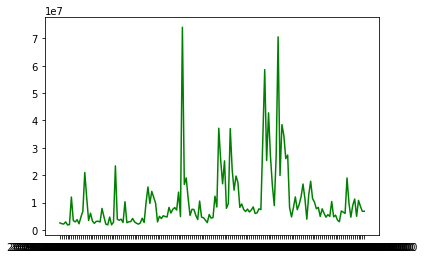

In [132]:
plt.plot(data['volumeto'][40:200],'g')

In [133]:
data.columns[1:7]

Index(['high', 'low', 'open', 'volumefrom', 'volumeto', 'close'], dtype='object')

In [134]:
from sklearn.preprocessing import MinMaxScaler
values = data[data.columns[1:7]].values.reshape(-1,6)
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
#scaled = (values-(np.min(values)))/(np.max(values)-(np.min(values)))

In [135]:
values

array([[7.2199302e+03, 7.1491499e+03, 7.1701802e+03, 1.5367900e+03,
        1.1041995e+07, 7.1661401e+03],
       [7.2083599e+03, 7.1660298e+03, 7.1661401e+03, 7.8510999e+02,
        5.6546075e+06, 7.1997900e+03],
       [7.2224302e+03, 7.1948701e+03, 7.1997900e+03, 6.7246002e+02,
        4.8552130e+06, 7.1999702e+03],
       ...,
       [3.3945410e+04, 3.3404871e+04, 3.3590199e+04, 1.4300601e+03,
        4.8159840e+07, 3.3576820e+04],
       [3.3907891e+04, 3.3467871e+04, 3.3576820e+04, 1.1982000e+03,
        4.0319460e+07, 3.3803020e+04],
       [3.3950672e+04, 3.3739629e+04, 3.3803020e+04, 5.6939001e+02,
        1.9288056e+07, 3.3897059e+04]], dtype=float32)

In [136]:
values[:,5]

array([ 7166.14,  7199.79,  7199.97, ..., 33576.82, 33803.02, 33897.06],
      dtype=float32)

In [137]:
np.max(values[:,5])

41490.84

In [138]:
scaler.data_max_[5]

41490.84

In [139]:
np.min(values[:,5])

4240.69

In [140]:
scaler.data_min_[5]

4240.69

In [141]:
scaled

array([[6.9533341e-02, 8.6421244e-02, 7.8643724e-02, 5.8386968e-03,
        1.2568906e-03, 7.8535259e-02],
       [6.9223486e-02, 8.6877085e-02, 7.8535259e-02, 2.6466567e-03,
        5.7133357e-04, 7.9438612e-02],
       [6.9600292e-02, 8.7655909e-02, 7.9438612e-02, 2.1682840e-03,
        4.6960887e-04, 7.9443455e-02],
       ...,
       [7.8523761e-01, 7.9544908e-01, 7.8790319e-01, 5.3854641e-03,
        5.9802183e-03, 7.8754401e-01],
       [7.8423285e-01, 7.9715037e-01, 7.8754401e-01, 4.4008605e-03,
        4.9825124e-03, 7.9361647e-01],
       [7.8537852e-01, 8.0448914e-01, 7.9361647e-01, 1.7305929e-03,
        2.3062201e-03, 7.9614097e-01]], dtype=float32)

In [142]:
scaled[:,5]

array([0.07853526, 0.07943861, 0.07944345, ..., 0.787544  , 0.7936165 ,
       0.79614097], dtype=float32)

In [143]:
scaled[:,5]*(scaler.data_max_[5]-scaler.data_min_[5])+scaler.data_min_[5]

array([ 7166.1396,  7199.79  ,  7199.9707, ..., 33576.82  , 33803.023 ,
       33897.06  ], dtype=float32)

In [144]:
values[:,5]

array([ 7166.14,  7199.79,  7199.97, ..., 33576.82, 33803.02, 33897.06],
      dtype=float32)

In [145]:
a = data[data.columns[1:7]]
a

,high,low,open,volumefrom,volumeto,close
timeUTC,,,,,,
2019-12-12 19:00:00,7219.93,7149.15,7170.18,1536.79,11041994.81,7166.14
2019-12-12 20:00:00,7208.36,7166.03,7166.14,785.11,5654607.43,7199.79
2019-12-12 21:00:00,7222.43,7194.87,7199.79,672.46,4855213.22,7199.97
2019-12-12 22:00:00,7211.80,7187.29,7199.97,807.61,5821087.81,7201.38
2019-12-12 23:00:00,7229.22,7152.84,7201.38,1606.06,11537799.57,7173.50
...,...,...,...,...,...,...
2021-02-01 11:00:00,33847.46,33257.39,33450.01,2066.49,69445570.35,33675.45
2021-02-01 12:00:00,33779.76,33505.50,33675.45,1173.82,39473368.04,33590.20
2021-02-01 13:00:00,33945.41,33404.87,33590.20,1430.06,48159838.72,33576.82


In [146]:
b = a.values.reshape(-1,6)
b

array([[7.21993000e+03, 7.14915000e+03, 7.17018000e+03, 1.53679000e+03,
        1.10419948e+07, 7.16614000e+03],
       [7.20836000e+03, 7.16603000e+03, 7.16614000e+03, 7.85110000e+02,
        5.65460743e+06, 7.19979000e+03],
       [7.22243000e+03, 7.19487000e+03, 7.19979000e+03, 6.72460000e+02,
        4.85521322e+06, 7.19997000e+03],
       ...,
       [3.39454100e+04, 3.34048700e+04, 3.35902000e+04, 1.43006000e+03,
        4.81598387e+07, 3.35768200e+04],
       [3.39078900e+04, 3.34678700e+04, 3.35768200e+04, 1.19820000e+03,
        4.03194582e+07, 3.38030200e+04],
       [3.39506700e+04, 3.37396300e+04, 3.38030200e+04, 5.69390000e+02,
        1.92880552e+07, 3.38970600e+04]])

In [147]:
data.columns[1:7]

Index(['high', 'low', 'open', 'volumefrom', 'volumeto', 'close'], dtype='object')

In [199]:
train_size = int(len(scaled) * 0.80)
val_size = int(len(scaled) * 0.10)

test_size = len(scaled) - train_size-val_size
train,val, test = scaled[0:train_size,:],scaled[train_size:train_size+val_size,:], scaled[train_size+val_size:,:]
print(len(train),len(val), len(test))

8004 1000 1001


In [200]:
def create_dataset_multistep(dataset, look_back=1,predict=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back-predict):
        a = dataset[i:(i + look_back)]
        dataX.append(a)
        dataY.append(dataset[i+ look_back-1: i+ look_back+predict-1, 0])
    print(len(dataY))
    return np.array(dataX), np.array(dataY)

In [201]:
look_back = 168
predict=24

trainX, trainY = create_dataset_multistep(train, look_back,predict)
valX, valY = create_dataset_multistep(val, look_back,predict)
testX, testY = create_dataset_multistep(test, look_back,predict)

7812
808
809


In [202]:
print(trainX.shape)
print(trainY.shape)

(7812, 168, 6)
(7812, 24)


In [203]:
trainY=np.reshape(trainY,(trainY.shape[0],trainY.shape[1],1))
valY=np.reshape(valY,(valY.shape[0],valY.shape[1],1))
testY=np.reshape(testY,(testY.shape[0],testY.shape[1],1))

In [204]:
trainY.shape

(7812, 24, 1)

In [154]:
SMALL_SIZE = 20
MEDIUM_SIZE = 23
BIGGER_SIZE = 25

plt.rc('font', size=SMALL_SIZE) # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE) # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE) # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE) # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE) # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE) # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) # fontsize of the figure title

## MTEX(1)

In [162]:
from sklearn.metrics import mean_absolute_error

In [163]:
'''
trainX = trainX.reshape(-1,168,6,1)
testX = testX.reshape(-1,168,6,1)
valX = valX.reshape(-1,168,6,1)
'''

'\ntrainX = trainX.reshape(-1,168,6,1)\ntestX = testX.reshape(-1,168,6,1)\nvalX = valX.reshape(-1,168,6,1)\n'

In [244]:
first_input = Input(shape=(168,6,1))

in0=Conv2D(filters=16, kernel_size=(168//3,1),input_shape=(168,6,1), activation='relu',padding='same')(first_input)
#in1= BatchNormalization(scale=False)(in1)

in1=Conv2D(filters=32, kernel_size=(168//5,1), activation='relu',padding='same')(in0)
#in0= BatchNormalization(scale=False)(in0)
#in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)

in1=Conv2D(filters=1, kernel_size=1, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in1)
print(in1.shape)
in1 = Reshape((168,6))(in1)
in0=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in1)

#in1=Conv1D(filters=64, kernel_size=2, activation='relu',padding='same')(in0)
#in0= BatchNormalization(scale=False)(in0)
#in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)

#in1=Conv1D(filters=64, kernel_size=1, activation='relu',padding='same',name='extractor')(in1)
#in1=add([in0,in1],name='extractor')
#attn_layer = AttentionLayer(name='attention_layer')
#attn_out, attn_states = attn_layer([in1,in1])

    # Concat attention input and LSTM output, in original code it was decoder LSTM
#concat_out = Concatenate(axis=-1, name='concat_layer')([in1, attn_out])
#in1=MaxPooling1D(pool_size=2,name='extractor')(in1)

#in1=add([in0,in1])
in1=Flatten()(in0)
#in1=Dense(50, activation='relu')(in1)
#in1=LSTM(64)(in1)
in1 = Dense(32,activation='relu')(in1)

out=Dense(24)(in1)
model=tf.keras.Model(inputs=[first_input],outputs=[out])
model.compile(optimizer='adam', loss='mse')


checkpoint_path = "saved_weights/bitcoin_MTEX_multistep(1).hdf5"
cb = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_best_only=True,
                                        monitor='val_loss',mode='min',
                                                 verbose=1)
model.summary()
# fit model9
# history=model.fit(trainX, trainY, epochs=200, batch_size=100, validation_data=(valX, valY), verbose=1, callbacks=[cb])

(None, 168, 6, 1)
Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 168, 6, 1)]       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 168, 6, 16)        912       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 168, 6, 32)        16928     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 168, 6, 1)         33        
_________________________________________________________________
reshape_4 (Reshape)          (None, 168, 6)            0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 168, 64)           1216      
_________________________________________________________________
flatten_4 (Flatten)          (None, 10752

In [245]:
model.load_weights("saved_weights/bitcoin_MTEX_multistep(1).hdf5")

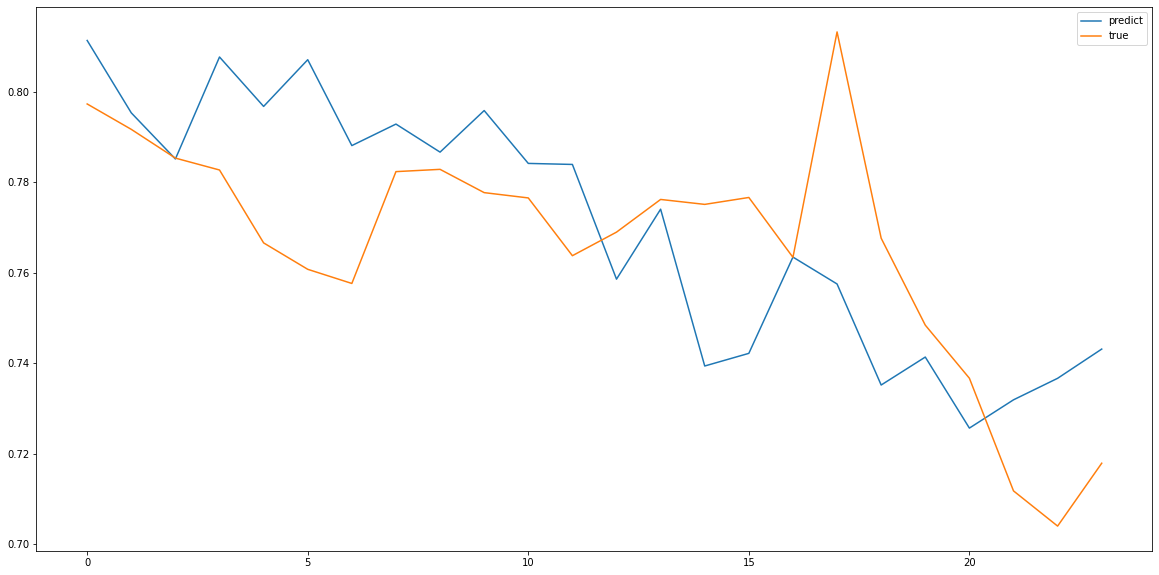

Test RMSE: 0.02477
Test MAE: 0.01987
Test MSE: 0.00061
Test RMSE: 283186857.26435
Test MAE: 233419456.00000


In [243]:
from sklearn.metrics import *

from matplotlib import pyplot
yhat = model.predict([testX])
plt.figure(figsize=(20,10))
yhat=yhat[24*6]
testy=testY[24*6]
testy=testy.reshape(-1,1)
pyplot.plot(yhat, label='predict')
pyplot.plot(testy, label='true')
pyplot.legend()
pyplot.show()

from math import *
rmse = sqrt(mean_squared_error(testy, yhat))
print('Test RMSE: %.5f' % rmse)

mae = mean_absolute_error(testy, yhat)
print('Test MAE: %.5f' % mae)

mse = mean_squared_error(testy, yhat)
print('Test MSE: %.5f' % mse)

rmse = sqrt(mean_squared_error(yhat_inverse, testY_inverse))
mae=mean_absolute_error(yhat_inverse, testY_inverse)
print('Test RMSE: %.5f' % rmse)
print('Test MAE: %.5f' % mae)

## MTEX(2)

In [252]:
first_input = Input(shape=(168,6,1))

in0=Conv2D(filters=16, kernel_size=(168//3,1),input_shape=(168,6,1), activation='relu',padding='same')(first_input)
#in1= BatchNormalization(scale=False)(in1)

in1=Conv2D(filters=32, kernel_size=(168//5,1), activation='relu',padding='same')(in0)
#in0= BatchNormalization(scale=False)(in0)
#in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)

in1=Conv2D(filters=1, kernel_size=1, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in1)
print(in1.shape)
in1 = Reshape((168,6))(in1)
in0=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in1)

#in1=Conv1D(filters=64, kernel_size=2, activation='relu',padding='same')(in0)
#in0= BatchNormalization(scale=False)(in0)
#in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)

#in1=Conv1D(filters=64, kernel_size=1, activation='relu',padding='same',name='extractor')(in1)
#in1=add([in0,in1],name='extractor')
#attn_layer = AttentionLayer(name='attention_layer')
#attn_out, attn_states = attn_layer([in1,in1])

    # Concat attention input and LSTM output, in original code it was decoder LSTM
#concat_out = Concatenate(axis=-1, name='concat_layer')([in1, attn_out])
#in1=MaxPooling1D(pool_size=2,name='extractor')(in1)

#in1=add([in0,in1])
in1=Flatten()(in0)
#in1=Dense(50, activation='relu')(in1)
#in1=LSTM(64)(in1)
in1 = Dense(32,activation='relu')(in1)

out=Dense(24)(in1)
model=tf.keras.Model(inputs=[first_input],outputs=[out])
model.compile(optimizer='adam', loss='mse')


checkpoint_path = "saved_weights/bitcoin_MTEX_multistep(2).hdf5"
cb = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_best_only=True,
                                        monitor='val_loss',mode='min',
                                                 verbose=1)
model.summary()
# fit model9
# history=model.fit(trainX, trainY, epochs=200, batch_size=100, validation_data=(valX, valY), verbose=1, callbacks=[cb])

(None, 168, 6, 1)
Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 168, 6, 1)]       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 168, 6, 16)        912       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 168, 6, 32)        16928     
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 168, 6, 1)         33        
_________________________________________________________________
reshape_5 (Reshape)          (None, 168, 6)            0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 168, 64)           1216      
_________________________________________________________________
flatten_5 (Flatten)          (None, 10752

In [253]:
model.load_weights("saved_weights/bitcoin_MTEX_multistep(2).hdf5")

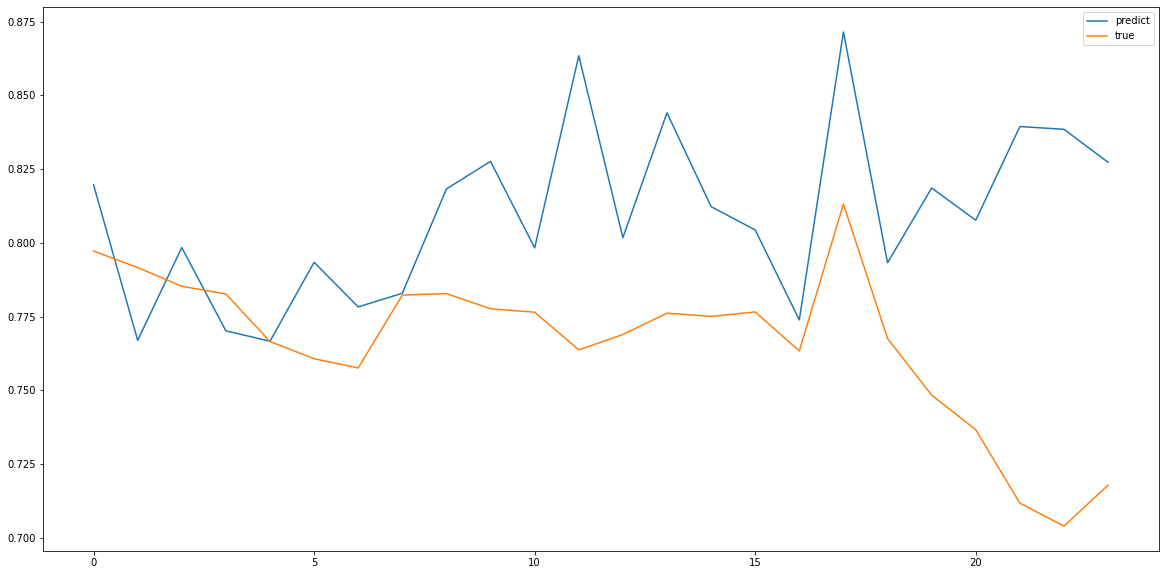

Test RMSE: 0.05967
Test MAE: 0.04611
Test MSE: 0.00356
Test RMSE: 283186857.26435
Test MAE: 233419456.00000


In [207]:
from sklearn.metrics import *

from matplotlib import pyplot
yhat = model.predict([testX])
plt.figure(figsize=(20,10))
yhat=yhat[24*6]
testy=testY[24*6]
testy=testy.reshape(-1,1)
pyplot.plot(yhat, label='predict')
pyplot.plot(testy, label='true')
pyplot.legend()
pyplot.show()

from math import *
rmse = sqrt(mean_squared_error(testy, yhat))
print('Test RMSE: %.5f' % rmse)

mae = mean_absolute_error(testy, yhat)
print('Test MAE: %.5f' % mae)

mse = mean_squared_error(testy, yhat)
print('Test MSE: %.5f' % mse)

rmse = sqrt(mean_squared_error(yhat_inverse, testY_inverse))
mae=mean_absolute_error(yhat_inverse, testY_inverse)
print('Test RMSE: %.5f' % rmse)
print('Test MAE: %.5f' % mae)

## MTEX(3)

In [255]:
first_input = Input(shape=(168,6,1))

in0=Conv2D(filters=16, kernel_size=(168//3,1),input_shape=(168,6,1), activation='relu',padding='same')(first_input)
#in1= BatchNormalization(scale=False)(in1)

in1=Conv2D(filters=32, kernel_size=(168//5,1), activation='relu',padding='same')(in0)
#in0= BatchNormalization(scale=False)(in0)
#in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)

in1=Conv2D(filters=1, kernel_size=1, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in1)
print(in1.shape)
in1 = Reshape((168,6))(in1)
in0=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in1)

#in1=Conv1D(filters=64, kernel_size=2, activation='relu',padding='same')(in0)
#in0= BatchNormalization(scale=False)(in0)
#in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)

#in1=Conv1D(filters=64, kernel_size=1, activation='relu',padding='same',name='extractor')(in1)
#in1=add([in0,in1],name='extractor')
#attn_layer = AttentionLayer(name='attention_layer')
#attn_out, attn_states = attn_layer([in1,in1])

    # Concat attention input and LSTM output, in original code it was decoder LSTM
#concat_out = Concatenate(axis=-1, name='concat_layer')([in1, attn_out])
#in1=MaxPooling1D(pool_size=2,name='extractor')(in1)

#in1=add([in0,in1])
in1=Flatten()(in0)
#in1=Dense(50, activation='relu')(in1)
#in1=LSTM(64)(in1)
in1 = Dense(32,activation='relu')(in1)

out=Dense(24)(in1)
model=tf.keras.Model(inputs=[first_input],outputs=[out])
model.compile(optimizer='adam', loss='mse')


checkpoint_path = "saved_weights/bitcoin_MTEX_multistep(3).hdf5"
cb = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_best_only=True,
                                        monitor='val_loss',mode='min',
                                                 verbose=1)
model.summary()
# fit model9
# history=model.fit(trainX, trainY, epochs=200, batch_size=100, validation_data=(valX, valY), verbose=1, callbacks=[cb])

(None, 168, 6, 1)
Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 168, 6, 1)]       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 168, 6, 16)        912       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 168, 6, 32)        16928     
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 168, 6, 1)         33        
_________________________________________________________________
reshape_6 (Reshape)          (None, 168, 6)            0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 168, 64)           1216      
_________________________________________________________________
flatten_6 (Flatten)          (None, 10752

In [256]:
model.load_weights("saved_weights/bitcoin_MTEX_multistep(3).hdf5")

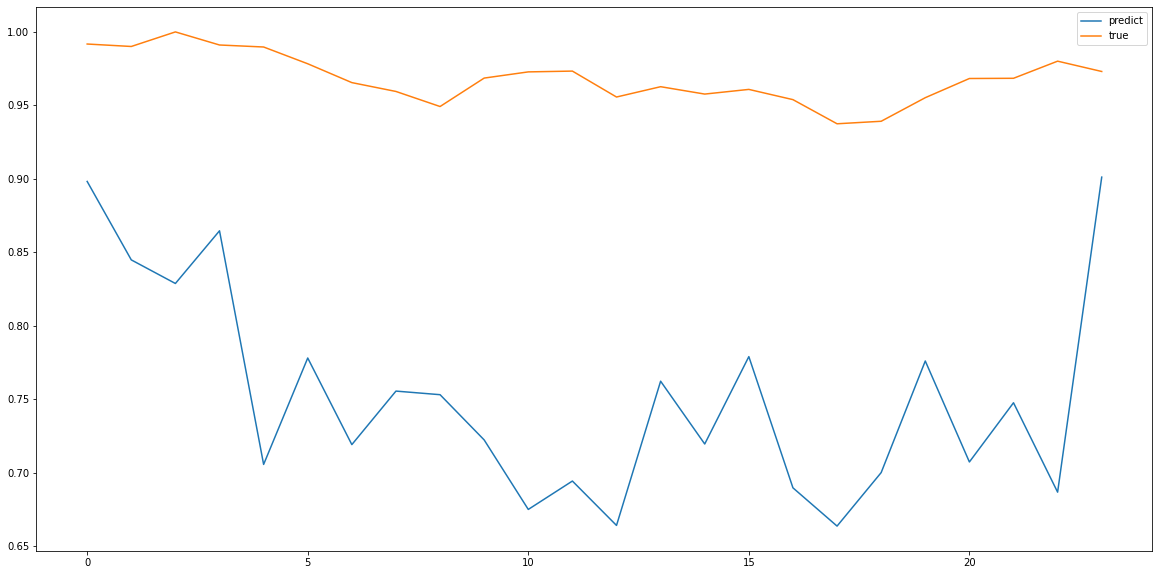

Test RMSE: 0.22564
Test MAE: 0.21698
Test MSE: 0.05091
Test RMSE: 283186857.26435
Test MAE: 233419456.00000


In [257]:
from sklearn.metrics import *

from matplotlib import pyplot
yhat = model.predict([testX])
plt.figure(figsize=(20,10))
yhat=yhat[24*11]
testy=testY[24*11]
testy=testy.reshape(-1,1)
pyplot.plot(yhat, label='predict')
pyplot.plot(testy, label='true')
pyplot.legend()
pyplot.show()

from math import *
rmse = sqrt(mean_squared_error(testy, yhat))
print('Test RMSE: %.5f' % rmse)

mae = mean_absolute_error(testy, yhat)
print('Test MAE: %.5f' % mae)

mse = mean_squared_error(testy, yhat)
print('Test MSE: %.5f' % mse)

rmse = sqrt(mean_squared_error(yhat_inverse, testY_inverse))
mae=mean_absolute_error(yhat_inverse, testY_inverse)
print('Test RMSE: %.5f' % rmse)
print('Test MAE: %.5f' % mae)

## MTEX(4)

In [29]:
first_input = Input(shape=(168,6,1))

in0=Conv2D(filters=16, kernel_size=(168//3,1),input_shape=(168,6,1), activation='relu',padding='same')(first_input)
#in1= BatchNormalization(scale=False)(in1)

in1=Conv2D(filters=32, kernel_size=(168//5,1), activation='relu',padding='same')(in0)
#in0= BatchNormalization(scale=False)(in0)
#in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)

in1=Conv2D(filters=1, kernel_size=1, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in1)
print(in1.shape)
in1 = Reshape((168,6))(in1)
in0=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in1)

#in1=Conv1D(filters=64, kernel_size=2, activation='relu',padding='same')(in0)
#in0= BatchNormalization(scale=False)(in0)
#in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)

#in1=Conv1D(filters=64, kernel_size=1, activation='relu',padding='same',name='extractor')(in1)
#in1=add([in0,in1],name='extractor')
#attn_layer = AttentionLayer(name='attention_layer')
#attn_out, attn_states = attn_layer([in1,in1])

    # Concat attention input and LSTM output, in original code it was decoder LSTM
#concat_out = Concatenate(axis=-1, name='concat_layer')([in1, attn_out])
#in1=MaxPooling1D(pool_size=2,name='extractor')(in1)

#in1=add([in0,in1])
in1=Flatten()(in0)
#in1=Dense(50, activation='relu')(in1)
#in1=LSTM(64)(in1)
in1 = Dense(32,activation='relu')(in1)

out=Dense(24)(in1)
model=tf.keras.Model(inputs=[first_input],outputs=[out])
model.compile(optimizer='adam', loss='mse')


checkpoint_path = "saved_weights/bitcoin_MTEX_multistep(4).hdf5"
cb = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_best_only=True,
                                        monitor='val_loss',mode='min',
                                                 verbose=1)
model.summary()
# fit model9
# history=model.fit(trainX, trainY, epochs=200, batch_size=100, validation_data=(valX, valY), verbose=1, callbacks=[cb])

(None, 168, 6, 1)
Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 168, 6, 1)]       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 168, 6, 16)        912       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 168, 6, 32)        16928     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 168, 6, 1)         33        
_________________________________________________________________
reshape_3 (Reshape)          (None, 168, 6)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 168, 64)           1216      
_________________________________________________________________
flatten_3 (Flatten)          (None, 10752

79/79 [==============================] - 6s 79ms/step - loss: 3.2801e-05 - val_loss: 4.7830e-04

Epoch 00038: val_loss did not improve from 0.00032
Epoch 39/200
79/79 [==============================] - 6s 80ms/step - loss: 3.5873e-05 - val_loss: 3.9526e-04

Epoch 00039: val_loss did not improve from 0.00032
Epoch 40/200
79/79 [==============================] - 6s 80ms/step - loss: 3.3758e-05 - val_loss: 3.4592e-04

Epoch 00040: val_loss did not improve from 0.00032
Epoch 41/200
79/79 [==============================] - 6s 80ms/step - loss: 4.4367e-05 - val_loss: 3.4276e-04

Epoch 00041: val_loss did not improve from 0.00032
Epoch 42/200
79/79 [==============================] - 6s 79ms/step - loss: 3.4837e-05 - val_loss: 8.9082e-04

Epoch 00042: val_loss did not improve from 0.00032
Epoch 43/200
79/79 [==============================] - 6s 79ms/step - loss: 3.9824e-05 - val_loss: 5.6257e-04

Epoch 00043: val_loss did not improve from 0.00032
Epoch 44/200
79/79 [===========================

79/79 [==============================] - 6s 79ms/step - loss: 2.6605e-05 - val_loss: 3.5871e-04

Epoch 00089: val_loss did not improve from 0.00027
Epoch 90/200
79/79 [==============================] - 6s 79ms/step - loss: 2.6485e-05 - val_loss: 2.9026e-04

Epoch 00090: val_loss did not improve from 0.00027
Epoch 91/200
79/79 [==============================] - 6s 80ms/step - loss: 2.7339e-05 - val_loss: 4.2843e-04

Epoch 00091: val_loss did not improve from 0.00027
Epoch 92/200
79/79 [==============================] - 6s 80ms/step - loss: 2.8046e-05 - val_loss: 3.6593e-04

Epoch 00092: val_loss did not improve from 0.00027
Epoch 93/200
79/79 [==============================] - 6s 80ms/step - loss: 2.4948e-05 - val_loss: 3.9660e-04

Epoch 00093: val_loss did not improve from 0.00027
Epoch 94/200
79/79 [==============================] - 6s 80ms/step - loss: 2.8425e-05 - val_loss: 3.2095e-04

Epoch 00094: val_loss did not improve from 0.00027
Epoch 95/200
79/79 [===========================

79/79 [==============================] - 6s 80ms/step - loss: 2.0981e-05 - val_loss: 5.3450e-04

Epoch 00140: val_loss did not improve from 0.00027
Epoch 141/200
79/79 [==============================] - 6s 80ms/step - loss: 2.0275e-05 - val_loss: 4.9891e-04

Epoch 00141: val_loss did not improve from 0.00027
Epoch 142/200
79/79 [==============================] - 7s 84ms/step - loss: 1.8888e-05 - val_loss: 0.0012

Epoch 00142: val_loss did not improve from 0.00027
Epoch 143/200
79/79 [==============================] - 7s 90ms/step - loss: 2.2415e-05 - val_loss: 5.1958e-04

Epoch 00143: val_loss did not improve from 0.00027
Epoch 144/200
79/79 [==============================] - 7s 89ms/step - loss: 2.1561e-05 - val_loss: 4.5934e-04

Epoch 00144: val_loss did not improve from 0.00027
Epoch 145/200
79/79 [==============================] - 7s 89ms/step - loss: 1.8473e-05 - val_loss: 7.4823e-04

Epoch 00145: val_loss did not improve from 0.00027
Epoch 146/200
79/79 [=========================

79/79 [==============================] - 7s 83ms/step - loss: 1.4216e-05 - val_loss: 8.9729e-04

Epoch 00191: val_loss did not improve from 0.00027
Epoch 192/200
79/79 [==============================] - 7s 83ms/step - loss: 1.4949e-05 - val_loss: 8.6266e-04

Epoch 00192: val_loss did not improve from 0.00027
Epoch 193/200
79/79 [==============================] - 7s 82ms/step - loss: 1.5965e-05 - val_loss: 6.7613e-04

Epoch 00193: val_loss did not improve from 0.00027
Epoch 194/200
79/79 [==============================] - 7s 83ms/step - loss: 1.8093e-05 - val_loss: 7.0484e-04

Epoch 00194: val_loss did not improve from 0.00027
Epoch 195/200
79/79 [==============================] - 6s 82ms/step - loss: 1.9807e-05 - val_loss: 7.0257e-04

Epoch 00195: val_loss did not improve from 0.00027
Epoch 196/200
79/79 [==============================] - 7s 85ms/step - loss: 1.4372e-05 - val_loss: 7.7899e-04

Epoch 00196: val_loss did not improve from 0.00027
Epoch 197/200
79/79 [=====================

In [259]:
model.load_weights("saved_weights/bitcoin_MTEX_multistep(4).hdf5")

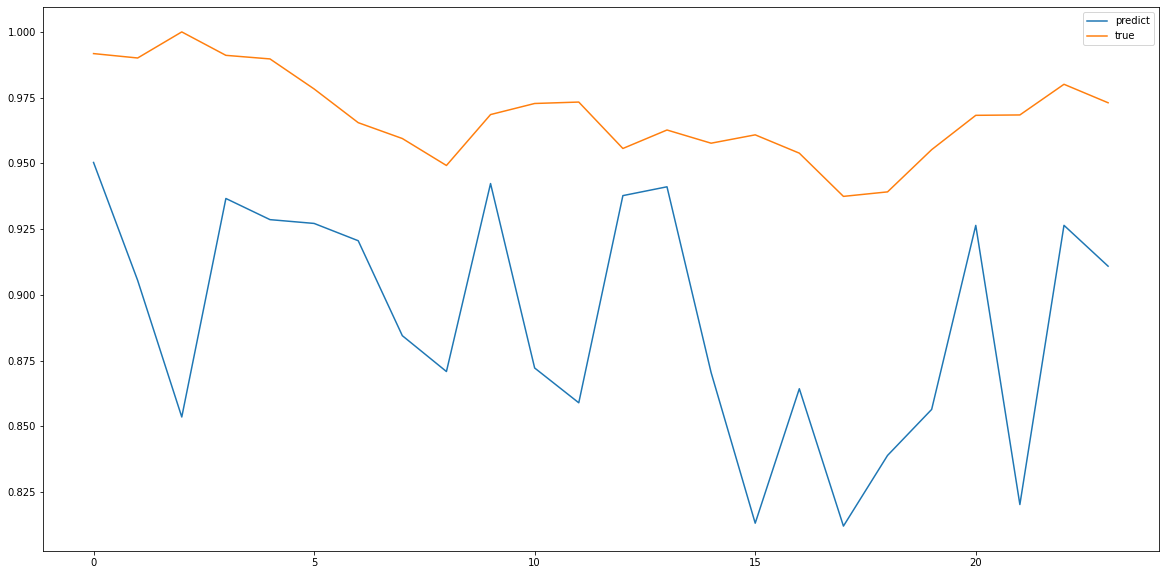

Test RMSE: 0.08696
Test MAE: 0.07803
Test MSE: 0.00756
Test RMSE: 283186857.26435
Test MAE: 233419456.00000


In [260]:
from sklearn.metrics import *

from matplotlib import pyplot
yhat = model.predict([testX])
plt.figure(figsize=(20,10))
yhat=yhat[24*11]
testy=testY[24*11]
testy=testy.reshape(-1,1)
pyplot.plot(yhat, label='predict')
pyplot.plot(testy, label='true')
pyplot.legend()
pyplot.show()

from math import *
rmse = sqrt(mean_squared_error(testy, yhat))
print('Test RMSE: %.5f' % rmse)

mae = mean_absolute_error(testy, yhat)
print('Test MAE: %.5f' % mae)

mse = mean_squared_error(testy, yhat)
print('Test MSE: %.5f' % mse)

rmse = sqrt(mean_squared_error(yhat_inverse, testY_inverse))
mae=mean_absolute_error(yhat_inverse, testY_inverse)
print('Test RMSE: %.5f' % rmse)
print('Test MAE: %.5f' % mae)

## MTEX(5)

In [264]:
first_input = Input(shape=(168,6,1))

in0=Conv2D(filters=16, kernel_size=(168//3,1),input_shape=(168,6,1), activation='relu',padding='same')(first_input)
#in1= BatchNormalization(scale=False)(in1)

in1=Conv2D(filters=32, kernel_size=(168//5,1), activation='relu',padding='same')(in0)
#in0= BatchNormalization(scale=False)(in0)
#in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)

in1=Conv2D(filters=1, kernel_size=1, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in1)
print(in1.shape)
in1 = Reshape((168,6))(in1)
in0=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in1)

#in1=Conv1D(filters=64, kernel_size=2, activation='relu',padding='same')(in0)
#in0= BatchNormalization(scale=False)(in0)
#in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)

#in1=Conv1D(filters=64, kernel_size=1, activation='relu',padding='same',name='extractor')(in1)
#in1=add([in0,in1],name='extractor')
#attn_layer = AttentionLayer(name='attention_layer')
#attn_out, attn_states = attn_layer([in1,in1])

    # Concat attention input and LSTM output, in original code it was decoder LSTM
#concat_out = Concatenate(axis=-1, name='concat_layer')([in1, attn_out])
#in1=MaxPooling1D(pool_size=2,name='extractor')(in1)

#in1=add([in0,in1])
in1=Flatten()(in0)
#in1=Dense(50, activation='relu')(in1)
#in1=LSTM(64)(in1)
in1 = Dense(32,activation='relu')(in1)

out=Dense(24)(in1)
model=tf.keras.Model(inputs=[first_input],outputs=[out])
model.compile(optimizer='adam', loss='mse')


checkpoint_path = "saved_weights/bitcoin_MTEX_multistep(5).hdf5"
cb = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_best_only=True,
                                        monitor='val_loss',mode='min',
                                                 verbose=1)
model.summary()
# fit model9
# history=model.fit(trainX, trainY, epochs=200, batch_size=100, validation_data=(valX, valY), verbose=1, callbacks=[cb])

(None, 168, 6, 1)
Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 168, 6, 1)]       0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 168, 6, 16)        912       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 168, 6, 32)        16928     
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 168, 6, 1)         33        
_________________________________________________________________
reshape_7 (Reshape)          (None, 168, 6)            0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 168, 64)           1216      
_________________________________________________________________
flatten_7 (Flatten)          (None, 10752

In [265]:
model.load_weights("saved_weights/bitcoin_MTEX_multistep(5).hdf5")

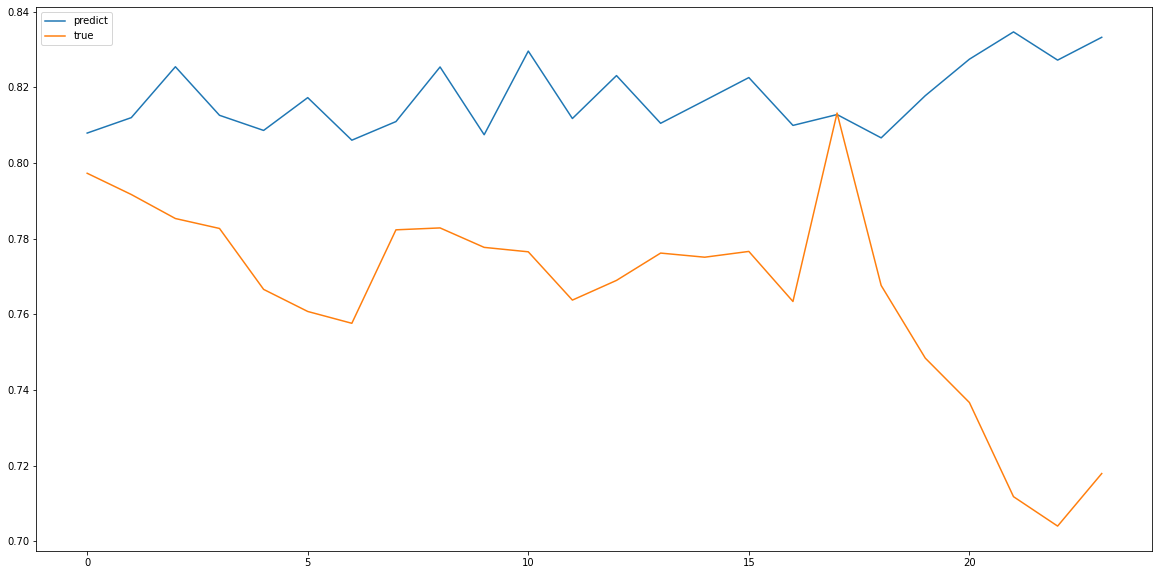

Test RMSE: 0.06026
Test MAE: 0.05137
Test MSE: 0.00363
Test RMSE: 283186857.26435
Test MAE: 233419456.00000


In [266]:
from sklearn.metrics import *

from matplotlib import pyplot
yhat = model.predict([testX])
plt.figure(figsize=(20,10))
yhat=yhat[24*6]
testy=testY[24*6]
testy=testy.reshape(-1,1)
pyplot.plot(yhat, label='predict')
pyplot.plot(testy, label='true')
pyplot.legend()
pyplot.show()

from math import *
rmse = sqrt(mean_squared_error(testy, yhat))
print('Test RMSE: %.5f' % rmse)

mae = mean_absolute_error(testy, yhat)
print('Test MAE: %.5f' % mae)

mse = mean_squared_error(testy, yhat)
print('Test MSE: %.5f' % mse)

rmse = sqrt(mean_squared_error(yhat_inverse, testY_inverse))
mae=mean_absolute_error(yhat_inverse, testY_inverse)
print('Test RMSE: %.5f' % rmse)
print('Test MAE: %.5f' % mae)

## MTEX(6)

In [119]:
first_input = Input(shape=(168,6,1))

in0=Conv2D(filters=16, kernel_size=(168//3,1),input_shape=(168,6,1), activation='relu',padding='same')(first_input)
#in1= BatchNormalization(scale=False)(in1)

in1=Conv2D(filters=32, kernel_size=(168//5,1), activation='relu',padding='same')(in0)
#in0= BatchNormalization(scale=False)(in0)
#in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)

in1=Conv2D(filters=1, kernel_size=1, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in1)
print(in1.shape)
in1 = Reshape((168,6))(in1)
in0=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in1)

#in1=Conv1D(filters=64, kernel_size=2, activation='relu',padding='same')(in0)
#in0= BatchNormalization(scale=False)(in0)
#in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)

#in1=Conv1D(filters=64, kernel_size=1, activation='relu',padding='same',name='extractor')(in1)
#in1=add([in0,in1],name='extractor')
#attn_layer = AttentionLayer(name='attention_layer')
#attn_out, attn_states = attn_layer([in1,in1])

    # Concat attention input and LSTM output, in original code it was decoder LSTM
#concat_out = Concatenate(axis=-1, name='concat_layer')([in1, attn_out])
#in1=MaxPooling1D(pool_size=2,name='extractor')(in1)

#in1=add([in0,in1])
in1=Flatten()(in0)
#in1=Dense(50, activation='relu')(in1)
#in1=LSTM(64)(in1)
in1 = Dense(32,activation='relu')(in1)

out=Dense(24)(in1)
model=tf.keras.Model(inputs=[first_input],outputs=[out])
model.compile(optimizer='adam', loss='mse')


checkpoint_path = "saved_weights/bitcoin_MTEX_multistep(6).hdf5"
cb = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_best_only=True,
                                        monitor='val_loss',mode='min',
                                                 verbose=1)
model.summary()
# fit model9
history=model.fit(trainX, trainY, epochs=200, batch_size=100, validation_data=(valX, valY), verbose=1, callbacks=[cb])

(None, 168, 6, 1)
Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 168, 6, 1)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 168, 6, 16)        912       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 168, 6, 32)        16928     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 168, 6, 1)         33        
_________________________________________________________________
reshape_1 (Reshape)          (None, 168, 6)            0         
_________________________________________________________________
conv1d_70 (Conv1D)           (None, 168, 64)           1216      
_________________________________________________________________
flatten_10 (Flatten)         (None, 1075

79/79 [==============================] - 6s 78ms/step - loss: 3.7761e-05 - val_loss: 2.8164e-04

Epoch 00039: val_loss did not improve from 0.00028
Epoch 40/200
79/79 [==============================] - 6s 78ms/step - loss: 3.3383e-05 - val_loss: 3.1162e-04

Epoch 00040: val_loss did not improve from 0.00028
Epoch 41/200
79/79 [==============================] - 6s 78ms/step - loss: 3.1606e-05 - val_loss: 3.7041e-04

Epoch 00041: val_loss did not improve from 0.00028
Epoch 42/200
79/79 [==============================] - 6s 78ms/step - loss: 3.2233e-05 - val_loss: 5.0351e-04

Epoch 00042: val_loss did not improve from 0.00028
Epoch 43/200
79/79 [==============================] - 6s 78ms/step - loss: 3.1556e-05 - val_loss: 6.1671e-04

Epoch 00043: val_loss did not improve from 0.00028
Epoch 44/200
79/79 [==============================] - 6s 78ms/step - loss: 3.3711e-05 - val_loss: 6.0053e-04

Epoch 00044: val_loss did not improve from 0.00028
Epoch 45/200
79/79 [===========================

79/79 [==============================] - 6s 78ms/step - loss: 2.4097e-05 - val_loss: 2.4228e-04

Epoch 00088: val_loss did not improve from 0.00022
Epoch 89/200
79/79 [==============================] - 6s 78ms/step - loss: 2.6457e-05 - val_loss: 3.2804e-04

Epoch 00089: val_loss did not improve from 0.00022
Epoch 90/200
79/79 [==============================] - 6s 78ms/step - loss: 2.4883e-05 - val_loss: 2.5667e-04

Epoch 00090: val_loss did not improve from 0.00022
Epoch 91/200
79/79 [==============================] - 6s 78ms/step - loss: 2.6377e-05 - val_loss: 5.6680e-04

Epoch 00091: val_loss did not improve from 0.00022
Epoch 92/200
79/79 [==============================] - 6s 78ms/step - loss: 2.2960e-05 - val_loss: 5.7825e-04

Epoch 00092: val_loss did not improve from 0.00022
Epoch 93/200
79/79 [==============================] - 6s 78ms/step - loss: 2.3292e-05 - val_loss: 2.6544e-04

Epoch 00093: val_loss did not improve from 0.00022
Epoch 94/200
79/79 [===========================

79/79 [==============================] - 6s 78ms/step - loss: 1.9413e-05 - val_loss: 3.6045e-04

Epoch 00139: val_loss did not improve from 0.00022
Epoch 140/200
79/79 [==============================] - 6s 78ms/step - loss: 1.8415e-05 - val_loss: 4.7372e-04

Epoch 00140: val_loss did not improve from 0.00022
Epoch 141/200
79/79 [==============================] - 6s 78ms/step - loss: 1.8265e-05 - val_loss: 6.0181e-04

Epoch 00141: val_loss did not improve from 0.00022
Epoch 142/200
79/79 [==============================] - 6s 78ms/step - loss: 1.6648e-05 - val_loss: 0.0011

Epoch 00142: val_loss did not improve from 0.00022
Epoch 143/200
79/79 [==============================] - 6s 78ms/step - loss: 1.8062e-05 - val_loss: 4.0532e-04

Epoch 00143: val_loss did not improve from 0.00022
Epoch 144/200
79/79 [==============================] - 6s 78ms/step - loss: 1.7387e-05 - val_loss: 4.4029e-04

Epoch 00144: val_loss did not improve from 0.00022
Epoch 145/200
79/79 [=========================

79/79 [==============================] - 6s 78ms/step - loss: 1.2601e-05 - val_loss: 3.3552e-04

Epoch 00190: val_loss did not improve from 0.00022
Epoch 191/200
79/79 [==============================] - 6s 78ms/step - loss: 1.3880e-05 - val_loss: 3.7578e-04

Epoch 00191: val_loss did not improve from 0.00022
Epoch 192/200
79/79 [==============================] - 6s 78ms/step - loss: 1.3421e-05 - val_loss: 3.1367e-04

Epoch 00192: val_loss did not improve from 0.00022
Epoch 193/200
79/79 [==============================] - 6s 79ms/step - loss: 1.2393e-05 - val_loss: 3.4227e-04

Epoch 00193: val_loss did not improve from 0.00022
Epoch 194/200
79/79 [==============================] - 6s 78ms/step - loss: 1.4777e-05 - val_loss: 3.6819e-04

Epoch 00194: val_loss did not improve from 0.00022
Epoch 195/200
79/79 [==============================] - 6s 82ms/step - loss: 1.2997e-05 - val_loss: 3.1741e-04

Epoch 00195: val_loss did not improve from 0.00022
Epoch 196/200
79/79 [=====================

In [120]:
model.load_weights("saved_weights/bitcoin_MTEX_multistep(6).hdf5")

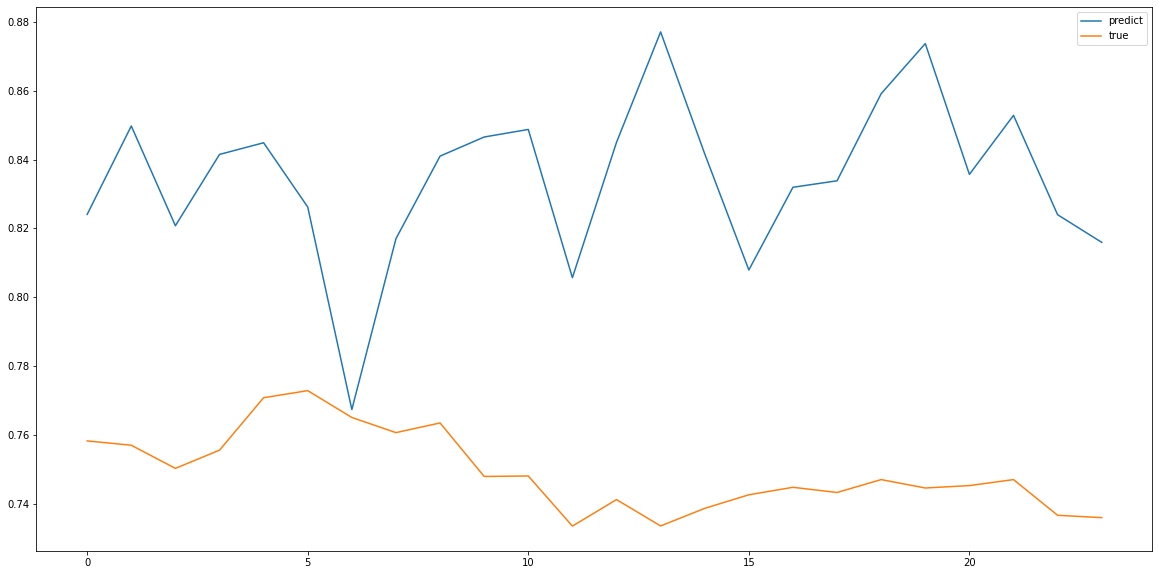

Test RMSE: 0.08955
Test MAE: 0.08532
Test MSE: 0.00802
Test MAPE: 0.11418
Test RMSE: 703845436.54994
Test MAE: 670582080.00000


In [121]:
from sklearn.metrics import *

from matplotlib import pyplot
yhat = model.predict([testX])
plt.figure(figsize=(20,10))
yhat=yhat[24*25+12]
testy=testY[24*25+12]
yhat=yhat.reshape(-1,1)
testy=testy.reshape(-1,1)
pyplot.plot(yhat, label='predict')
pyplot.plot(testy, label='true')
pyplot.legend()
pyplot.show()

from math import *
rmse = sqrt(mean_squared_error(testy, yhat))
print('Test RMSE: %.5f' % rmse)

mae = mean_absolute_error(testy, yhat)
print('Test MAE: %.5f' % mae)

mse = mean_squared_error(testy, yhat)
print('Test MSE: %.5f' % mse)

mape=mean_absolute_percentage_error(testy, yhat)
print('Test MAPE: %.5f' % mape)

yhat_inverse = yhat*(np.max(values)-np.min(values))+np.min(values)
testY_inverse=testy*(np.max(values)-np.min(values))+np.min(values)
rmse = sqrt(mean_squared_error(yhat_inverse, testY_inverse))
mae=mean_absolute_error(yhat_inverse, testY_inverse)
print('Test RMSE: %.5f' % rmse)
print('Test MAE: %.5f' % mae)

## MTEX(7)

In [41]:
first_input = Input(shape=(168,6,1))

in0=Conv2D(filters=16, kernel_size=(168//3,1),input_shape=(168,6,1), activation='relu',padding='same')(first_input)
#in1= BatchNormalization(scale=False)(in1)

in1=Conv2D(filters=32, kernel_size=(168//5,1), activation='relu',padding='same')(in0)
#in0= BatchNormalization(scale=False)(in0)
#in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)

in1=Conv2D(filters=1, kernel_size=1, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in1)
print(in1.shape)
in1 = Reshape((168,6))(in1)
in0=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in1)

#in1=Conv1D(filters=64, kernel_size=2, activation='relu',padding='same')(in0)
#in0= BatchNormalization(scale=False)(in0)
#in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)

#in1=Conv1D(filters=64, kernel_size=1, activation='relu',padding='same',name='extractor')(in1)
#in1=add([in0,in1],name='extractor')
#attn_layer = AttentionLayer(name='attention_layer')
#attn_out, attn_states = attn_layer([in1,in1])

    # Concat attention input and LSTM output, in original code it was decoder LSTM
#concat_out = Concatenate(axis=-1, name='concat_layer')([in1, attn_out])
#in1=MaxPooling1D(pool_size=2,name='extractor')(in1)

#in1=add([in0,in1])
in1=Flatten()(in0)
#in1=Dense(50, activation='relu')(in1)
#in1=LSTM(64)(in1)
in1 = Dense(32,activation='relu')(in1)

out=Dense(24)(in1)
model=tf.keras.Model(inputs=[first_input],outputs=[out])
model.compile(optimizer='adam', loss='mse')


checkpoint_path = "saved_weights/bitcoin_MTEX_multistep(7).hdf5"
cb = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_best_only=True,
                                        monitor='val_loss',mode='min',
                                                 verbose=1)
model.summary()
# fit model9
# history=model.fit(trainX, trainY, epochs=200, batch_size=100, validation_data=(valX, valY), verbose=1, callbacks=[cb])

(None, 168, 6, 1)
Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 168, 6, 1)]       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 168, 6, 16)        912       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 168, 6, 32)        16928     
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 168, 6, 1)         33        
_________________________________________________________________
reshape_6 (Reshape)          (None, 168, 6)            0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 168, 64)           1216      
_________________________________________________________________
flatten_6 (Flatten)          (None, 10752


Epoch 00040: val_loss did not improve from 0.00067
Epoch 41/200
79/79 [==============================] - 6s 80ms/step - loss: 3.1986e-05 - val_loss: 4.6900e-04

Epoch 00041: val_loss improved from 0.00067 to 0.00047, saving model to saved_weights/bitcoin_MTEX_multistep(7).hdf5
Epoch 42/200
79/79 [==============================] - 6s 80ms/step - loss: 3.8209e-05 - val_loss: 5.6071e-04

Epoch 00042: val_loss did not improve from 0.00047
Epoch 43/200
79/79 [==============================] - 6s 80ms/step - loss: 5.3275e-05 - val_loss: 0.0012

Epoch 00043: val_loss did not improve from 0.00047
Epoch 44/200
79/79 [==============================] - 6s 80ms/step - loss: 4.0048e-05 - val_loss: 0.0023

Epoch 00044: val_loss did not improve from 0.00047
Epoch 45/200
79/79 [==============================] - 6s 80ms/step - loss: 3.4197e-05 - val_loss: 0.0015

Epoch 00045: val_loss did not improve from 0.00047
Epoch 46/200
79/79 [==============================] - 6s 81ms/step - loss: 3.8885e-05 - v

79/79 [==============================] - 6s 80ms/step - loss: 1.6207e-05 - val_loss: 0.0043

Epoch 00142: val_loss did not improve from 0.00038
Epoch 143/200
79/79 [==============================] - 6s 80ms/step - loss: 1.4113e-05 - val_loss: 0.0050

Epoch 00143: val_loss did not improve from 0.00038
Epoch 144/200
79/79 [==============================] - 6s 80ms/step - loss: 1.5429e-05 - val_loss: 0.0042

Epoch 00144: val_loss did not improve from 0.00038
Epoch 145/200
79/79 [==============================] - 6s 80ms/step - loss: 1.3341e-05 - val_loss: 0.0050

Epoch 00145: val_loss did not improve from 0.00038
Epoch 146/200
79/79 [==============================] - 6s 80ms/step - loss: 1.5262e-05 - val_loss: 0.0068

Epoch 00146: val_loss did not improve from 0.00038
Epoch 147/200
79/79 [==============================] - 7s 83ms/step - loss: 1.5172e-05 - val_loss: 0.0038

Epoch 00147: val_loss did not improve from 0.00038
Epoch 148/200
79/79 [==============================] - 6s 80ms/ste

79/79 [==============================] - 6s 80ms/step - loss: 1.0553e-05 - val_loss: 0.0082

Epoch 00194: val_loss did not improve from 0.00038
Epoch 195/200
79/79 [==============================] - 6s 80ms/step - loss: 1.1749e-05 - val_loss: 0.0049

Epoch 00195: val_loss did not improve from 0.00038
Epoch 196/200
79/79 [==============================] - 6s 80ms/step - loss: 1.1033e-05 - val_loss: 0.0064

Epoch 00196: val_loss did not improve from 0.00038
Epoch 197/200
79/79 [==============================] - 6s 80ms/step - loss: 1.0419e-05 - val_loss: 0.0117

Epoch 00197: val_loss did not improve from 0.00038
Epoch 198/200
79/79 [==============================] - 6s 80ms/step - loss: 1.2232e-05 - val_loss: 0.0061

Epoch 00198: val_loss did not improve from 0.00038
Epoch 199/200
79/79 [==============================] - 6s 80ms/step - loss: 1.0352e-05 - val_loss: 0.0067

Epoch 00199: val_loss did not improve from 0.00038
Epoch 200/200
79/79 [==============================] - 6s 80ms/ste

In [42]:
model.load_weights("saved_weights/bitcoin_MTEX_multistep(7).hdf5")

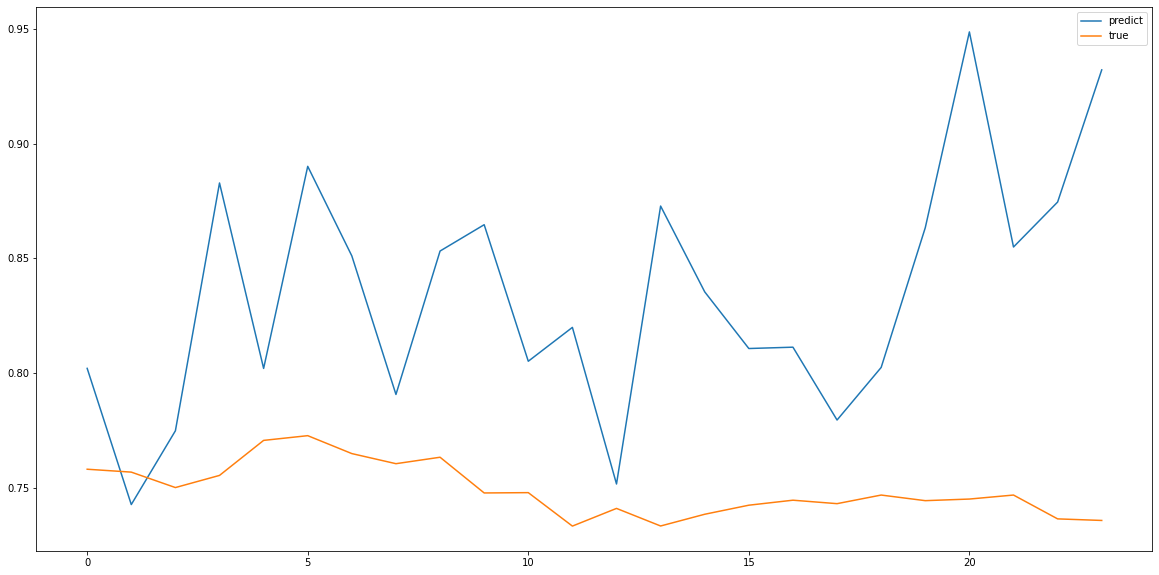

Test RMSE: 0.10025
Test MAE: 0.08590
Test MSE: 0.01005
Test MAPE: 0.11498
Test RMSE: 787914163.58386
Test MAE: 675170560.00000


In [44]:
from sklearn.metrics import *

from matplotlib import pyplot
yhat = model.predict([testX])
plt.figure(figsize=(20,10))
yhat=yhat[24*25+12]
testy=testY[24*25+12]
yhat=yhat.reshape(-1,1)
testy=testy.reshape(-1,1)
pyplot.plot(yhat, label='predict')
pyplot.plot(testy, label='true')
pyplot.legend()
pyplot.show()

from math import *
rmse = sqrt(mean_squared_error(testy, yhat))
print('Test RMSE: %.5f' % rmse)

mae = mean_absolute_error(testy, yhat)
print('Test MAE: %.5f' % mae)

mse = mean_squared_error(testy, yhat)
print('Test MSE: %.5f' % mse)

mape=mean_absolute_percentage_error(testy, yhat)
print('Test MAPE: %.5f' % mape)

yhat_inverse = yhat*(np.max(values)-np.min(values))+np.min(values)
testY_inverse=testy*(np.max(values)-np.min(values))+np.min(values)
rmse = sqrt(mean_squared_error(yhat_inverse, testY_inverse))
mae=mean_absolute_error(yhat_inverse, testY_inverse)
print('Test RMSE: %.5f' % rmse)
print('Test MAE: %.5f' % mae)

## MTEX(8)

In [45]:
first_input = Input(shape=(168,6,1))

in0=Conv2D(filters=16, kernel_size=(168//3,1),input_shape=(168,6,1), activation='relu',padding='same')(first_input)
#in1= BatchNormalization(scale=False)(in1)

in1=Conv2D(filters=32, kernel_size=(168//5,1), activation='relu',padding='same')(in0)
#in0= BatchNormalization(scale=False)(in0)
#in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)

in1=Conv2D(filters=1, kernel_size=1, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in1)
print(in1.shape)
in1 = Reshape((168,6))(in1)
in0=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in1)

#in1=Conv1D(filters=64, kernel_size=2, activation='relu',padding='same')(in0)
#in0= BatchNormalization(scale=False)(in0)
#in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)

#in1=Conv1D(filters=64, kernel_size=1, activation='relu',padding='same',name='extractor')(in1)
#in1=add([in0,in1],name='extractor')
#attn_layer = AttentionLayer(name='attention_layer')
#attn_out, attn_states = attn_layer([in1,in1])

    # Concat attention input and LSTM output, in original code it was decoder LSTM
#concat_out = Concatenate(axis=-1, name='concat_layer')([in1, attn_out])
#in1=MaxPooling1D(pool_size=2,name='extractor')(in1)

#in1=add([in0,in1])
in1=Flatten()(in0)
#in1=Dense(50, activation='relu')(in1)
#in1=LSTM(64)(in1)
in1 = Dense(32,activation='relu')(in1)

out=Dense(24)(in1)
model=tf.keras.Model(inputs=[first_input],outputs=[out])
model.compile(optimizer='adam', loss='mse')


checkpoint_path = "saved_weights/bitcoin_MTEX_multistep(8).hdf5"
cb = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_best_only=True,
                                        monitor='val_loss',mode='min',
                                                 verbose=1)
model.summary()
# fit model9
# history=model.fit(trainX, trainY, epochs=200, batch_size=100, validation_data=(valX, valY), verbose=1, callbacks=[cb])

(None, 168, 6, 1)
Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 168, 6, 1)]       0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 168, 6, 16)        912       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 168, 6, 32)        16928     
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 168, 6, 1)         33        
_________________________________________________________________
reshape_7 (Reshape)          (None, 168, 6)            0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 168, 64)           1216      
_________________________________________________________________
flatten_7 (Flatten)          (None, 10752

79/79 [==============================] - 6s 80ms/step - loss: 3.3584e-05 - val_loss: 0.0096

Epoch 00091: val_loss did not improve from 0.00675
Epoch 92/200
79/79 [==============================] - 6s 80ms/step - loss: 2.8016e-05 - val_loss: 0.0109

Epoch 00092: val_loss did not improve from 0.00675
Epoch 93/200
79/79 [==============================] - 6s 80ms/step - loss: 2.8885e-05 - val_loss: 0.0095

Epoch 00093: val_loss did not improve from 0.00675
Epoch 94/200
79/79 [==============================] - 6s 80ms/step - loss: 2.7857e-05 - val_loss: 0.0094

Epoch 00094: val_loss did not improve from 0.00675
Epoch 95/200
79/79 [==============================] - 6s 80ms/step - loss: 2.5168e-05 - val_loss: 0.0098

Epoch 00095: val_loss did not improve from 0.00675
Epoch 96/200
79/79 [==============================] - 6s 79ms/step - loss: 2.8461e-05 - val_loss: 0.0092

Epoch 00096: val_loss did not improve from 0.00675
Epoch 97/200
79/79 [==============================] - 6s 80ms/step - lo

79/79 [==============================] - 6s 80ms/step - loss: 1.9927e-05 - val_loss: 0.0030

Epoch 00141: val_loss did not improve from 0.00192
Epoch 142/200
79/79 [==============================] - 6s 80ms/step - loss: 3.0453e-05 - val_loss: 0.0026

Epoch 00142: val_loss did not improve from 0.00192
Epoch 143/200
79/79 [==============================] - 6s 80ms/step - loss: 2.0055e-05 - val_loss: 0.0023

Epoch 00143: val_loss did not improve from 0.00192
Epoch 144/200
79/79 [==============================] - 6s 80ms/step - loss: 1.8430e-05 - val_loss: 0.0024

Epoch 00144: val_loss did not improve from 0.00192
Epoch 145/200
79/79 [==============================] - 6s 80ms/step - loss: 1.7956e-05 - val_loss: 0.0023

Epoch 00145: val_loss did not improve from 0.00192
Epoch 146/200
79/79 [==============================] - 6s 80ms/step - loss: 1.7322e-05 - val_loss: 0.0029

Epoch 00146: val_loss did not improve from 0.00192
Epoch 147/200
79/79 [==============================] - 6s 80ms/ste


Epoch 00188: val_loss did not improve from 0.00056
Epoch 189/200
79/79 [==============================] - 6s 80ms/step - loss: 1.4277e-05 - val_loss: 7.5671e-04

Epoch 00189: val_loss did not improve from 0.00056
Epoch 190/200
79/79 [==============================] - 6s 80ms/step - loss: 1.3150e-05 - val_loss: 5.7397e-04

Epoch 00190: val_loss did not improve from 0.00056
Epoch 191/200
79/79 [==============================] - 6s 80ms/step - loss: 1.6471e-05 - val_loss: 6.4895e-04

Epoch 00191: val_loss did not improve from 0.00056
Epoch 192/200
79/79 [==============================] - 6s 80ms/step - loss: 1.4953e-05 - val_loss: 7.3108e-04

Epoch 00192: val_loss did not improve from 0.00056
Epoch 193/200
79/79 [==============================] - 6s 80ms/step - loss: 1.3583e-05 - val_loss: 6.4912e-04

Epoch 00193: val_loss did not improve from 0.00056
Epoch 194/200
79/79 [==============================] - 6s 80ms/step - loss: 1.2254e-05 - val_loss: 8.6692e-04

Epoch 00194: val_loss did n

In [57]:
model.load_weights("saved_weights/bitcoin_MTEX_multistep(8).hdf5")

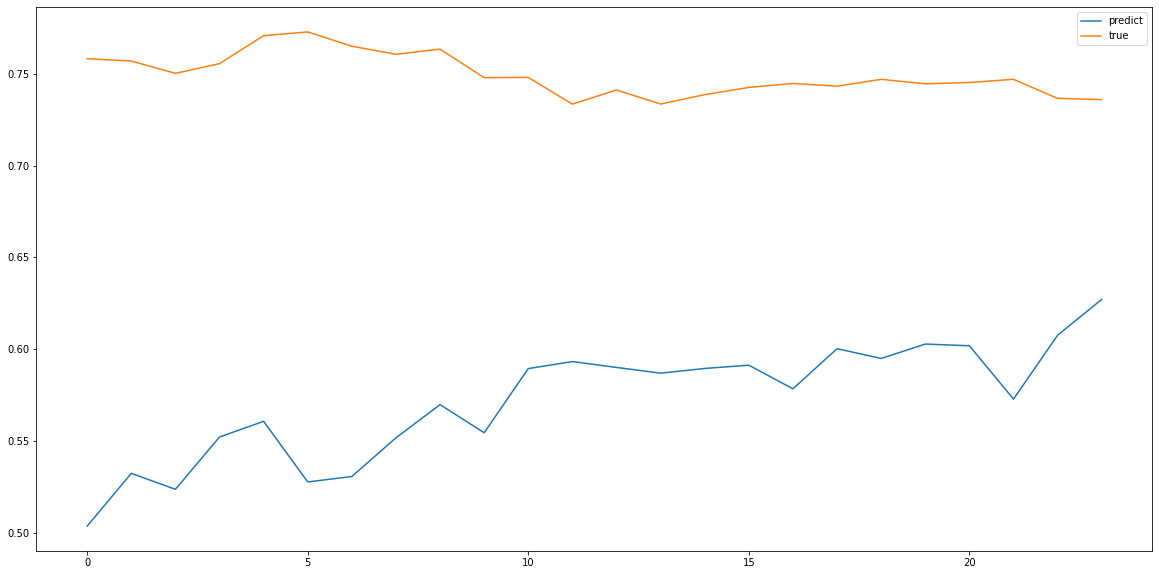

Test RMSE: 0.18155
Test MAE: 0.17713
Test MSE: 0.03296
Test MAPE: 0.23576
Test RMSE: 1426891138.19941
Test MAE: 1392203264.00000


In [59]:
from sklearn.metrics import *

from matplotlib import pyplot
yhat = model.predict([testX])
plt.figure(figsize=(20,10))
yhat=yhat[24*25+12]
testy=testY[24*25+12]
yhat=yhat.reshape(-1,1)
testy=testy.reshape(-1,1)
pyplot.plot(yhat, label='predict')
pyplot.plot(testy, label='true')
pyplot.legend()
pyplot.show()

from math import *
rmse = sqrt(mean_squared_error(testy, yhat))
print('Test RMSE: %.5f' % rmse)

mae = mean_absolute_error(testy, yhat)
print('Test MAE: %.5f' % mae)

mse = mean_squared_error(testy, yhat)
print('Test MSE: %.5f' % mse)

mape=mean_absolute_percentage_error(testy, yhat)
print('Test MAPE: %.5f' % mape)

yhat_inverse = yhat*(np.max(values)-np.min(values))+np.min(values)
testY_inverse=testy*(np.max(values)-np.min(values))+np.min(values)
rmse = sqrt(mean_squared_error(yhat_inverse, testY_inverse))
mae=mean_absolute_error(yhat_inverse, testY_inverse)
print('Test RMSE: %.5f' % rmse)
print('Test MAE: %.5f' % mae)

## MTEX(9)

In [49]:
first_input = Input(shape=(168,6,1))

in0=Conv2D(filters=16, kernel_size=(168//3,1),input_shape=(168,6,1), activation='relu',padding='same')(first_input)
#in1= BatchNormalization(scale=False)(in1)

in1=Conv2D(filters=32, kernel_size=(168//5,1), activation='relu',padding='same')(in0)
#in0= BatchNormalization(scale=False)(in0)
#in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)

in1=Conv2D(filters=1, kernel_size=1, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in1)
print(in1.shape)
in1 = Reshape((168,6))(in1)
in0=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in1)

#in1=Conv1D(filters=64, kernel_size=2, activation='relu',padding='same')(in0)
#in0= BatchNormalization(scale=False)(in0)
#in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)

#in1=Conv1D(filters=64, kernel_size=1, activation='relu',padding='same',name='extractor')(in1)
#in1=add([in0,in1],name='extractor')
#attn_layer = AttentionLayer(name='attention_layer')
#attn_out, attn_states = attn_layer([in1,in1])

    # Concat attention input and LSTM output, in original code it was decoder LSTM
#concat_out = Concatenate(axis=-1, name='concat_layer')([in1, attn_out])
#in1=MaxPooling1D(pool_size=2,name='extractor')(in1)

#in1=add([in0,in1])
in1=Flatten()(in0)
#in1=Dense(50, activation='relu')(in1)
#in1=LSTM(64)(in1)
in1 = Dense(32,activation='relu')(in1)

out=Dense(24)(in1)
model=tf.keras.Model(inputs=[first_input],outputs=[out])
model.compile(optimizer='adam', loss='mse')


checkpoint_path = "saved_weights/bitcoin_MTEX_multistep(9).hdf5"
cb = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_best_only=True,
                                        monitor='val_loss',mode='min',
                                                 verbose=1)
model.summary()
# fit model9
# history=model.fit(trainX, trainY, epochs=200, batch_size=100, validation_data=(valX, valY), verbose=1, callbacks=[cb])

(None, 168, 6, 1)
Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 168, 6, 1)]       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 168, 6, 16)        912       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 168, 6, 32)        16928     
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 168, 6, 1)         33        
_________________________________________________________________
reshape_8 (Reshape)          (None, 168, 6)            0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 168, 64)           1216      
_________________________________________________________________
flatten_8 (Flatten)          (None, 10752


Epoch 00094: val_loss did not improve from 0.06404
Epoch 95/200
79/79 [==============================] - 6s 80ms/step - loss: 0.0026 - val_loss: 0.0688

Epoch 00095: val_loss did not improve from 0.06404
Epoch 96/200
79/79 [==============================] - 6s 80ms/step - loss: 0.0026 - val_loss: 0.0701

Epoch 00096: val_loss did not improve from 0.06404
Epoch 97/200
79/79 [==============================] - 6s 79ms/step - loss: 0.0026 - val_loss: 0.0699

Epoch 00097: val_loss did not improve from 0.06404
Epoch 98/200
79/79 [==============================] - 6s 80ms/step - loss: 0.0026 - val_loss: 0.0678

Epoch 00098: val_loss did not improve from 0.06404
Epoch 99/200
79/79 [==============================] - 6s 80ms/step - loss: 0.0026 - val_loss: 0.0683

Epoch 00099: val_loss did not improve from 0.06404
Epoch 100/200
79/79 [==============================] - 6s 80ms/step - loss: 0.0026 - val_loss: 0.0690

Epoch 00100: val_loss did not improve from 0.06404
Epoch 101/200
79/79 [========

79/79 [==============================] - 6s 79ms/step - loss: 0.0026 - val_loss: 0.0688

Epoch 00148: val_loss did not improve from 0.06404
Epoch 149/200
79/79 [==============================] - 6s 80ms/step - loss: 0.0026 - val_loss: 0.0692

Epoch 00149: val_loss did not improve from 0.06404
Epoch 150/200
79/79 [==============================] - 6s 80ms/step - loss: 0.0026 - val_loss: 0.0685

Epoch 00150: val_loss did not improve from 0.06404
Epoch 151/200
79/79 [==============================] - 6s 80ms/step - loss: 0.0026 - val_loss: 0.0700

Epoch 00151: val_loss did not improve from 0.06404
Epoch 152/200
79/79 [==============================] - 6s 80ms/step - loss: 0.0026 - val_loss: 0.0699

Epoch 00152: val_loss did not improve from 0.06404
Epoch 153/200
79/79 [==============================] - 6s 80ms/step - loss: 0.0026 - val_loss: 0.0684

Epoch 00153: val_loss did not improve from 0.06404
Epoch 154/200
79/79 [==============================] - 6s 80ms/step - loss: 0.0026 - val_l

In [50]:
model.load_weights("saved_weights/bitcoin_MTEX_multistep(9).hdf5")

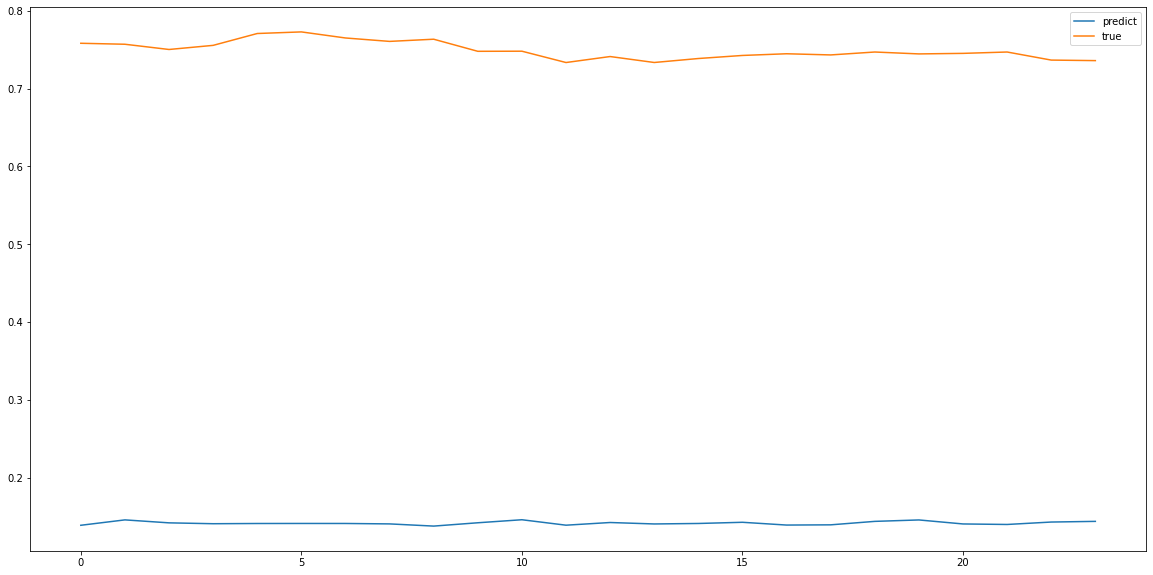

Test RMSE: 0.60781
Test MAE: 0.60770
Test MSE: 0.36944
Test MAPE: 0.81089
Test RMSE: 4777146773.29544
Test MAE: 4776276480.00000


In [52]:
from sklearn.metrics import *

from matplotlib import pyplot
yhat = model.predict([testX])
plt.figure(figsize=(20,10))
yhat=yhat[24*25+12]
testy=testY[24*25+12]
yhat=yhat.reshape(-1,1)
testy=testy.reshape(-1,1)
pyplot.plot(yhat, label='predict')
pyplot.plot(testy, label='true')
pyplot.legend()
pyplot.show()

from math import *
rmse = sqrt(mean_squared_error(testy, yhat))
print('Test RMSE: %.5f' % rmse)

mae = mean_absolute_error(testy, yhat)
print('Test MAE: %.5f' % mae)

mse = mean_squared_error(testy, yhat)
print('Test MSE: %.5f' % mse)

mape=mean_absolute_percentage_error(testy, yhat)
print('Test MAPE: %.5f' % mape)

yhat_inverse = yhat*(np.max(values)-np.min(values))+np.min(values)
testY_inverse=testy*(np.max(values)-np.min(values))+np.min(values)
rmse = sqrt(mean_squared_error(yhat_inverse, testY_inverse))
mae=mean_absolute_error(yhat_inverse, testY_inverse)
print('Test RMSE: %.5f' % rmse)
print('Test MAE: %.5f' % mae)

## MTEX(10)

In [155]:
first_input = Input(shape=(168,6,1))

in0=Conv2D(filters=16, kernel_size=(168//3,1),input_shape=(168,6,1), activation='relu',padding='same')(first_input)
#in1= BatchNormalization(scale=False)(in1)

in1=Conv2D(filters=32, kernel_size=(168//5,1), activation='relu',padding='same')(in0)
#in0= BatchNormalization(scale=False)(in0)
#in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)

in1=Conv2D(filters=1, kernel_size=1, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in1)
print(in1.shape)
in1 = Reshape((168,6))(in1)
in0=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in1)

#in1=Conv1D(filters=64, kernel_size=2, activation='relu',padding='same')(in0)
#in0= BatchNormalization(scale=False)(in0)
#in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)

#in1=Conv1D(filters=64, kernel_size=1, activation='relu',padding='same',name='extractor')(in1)
#in1=add([in0,in1],name='extractor')
#attn_layer = AttentionLayer(name='attention_layer')
#attn_out, attn_states = attn_layer([in1,in1])

    # Concat attention input and LSTM output, in original code it was decoder LSTM
#concat_out = Concatenate(axis=-1, name='concat_layer')([in1, attn_out])
#in1=MaxPooling1D(pool_size=2,name='extractor')(in1)

#in1=add([in0,in1])
in1=Flatten()(in0)
#in1=Dense(50, activation='relu')(in1)
#in1=LSTM(64)(in1)
in1 = Dense(32,activation='relu')(in1)

out=Dense(24)(in1)
model=tf.keras.Model(inputs=[first_input],outputs=[out])
model.compile(optimizer='adam', loss='mse')


checkpoint_path = "saved_weights/bitcoin_MTEX_multistep(10).hdf5"
cb = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_best_only=True,
                                        monitor='val_loss',mode='min',
                                                 verbose=1)
model.summary()
# fit model9
# history=model.fit(trainX, trainY, epochs=200, batch_size=100, validation_data=(valX, valY), verbose=1, callbacks=[cb])

(None, 168, 6, 1)
Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 168, 6, 1)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 168, 6, 16)        912       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 168, 6, 32)        16928     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 168, 6, 1)         33        
_________________________________________________________________
reshape_2 (Reshape)          (None, 168, 6)            0         
_________________________________________________________________
conv1d_71 (Conv1D)           (None, 168, 64)           1216      
_________________________________________________________________
flatten_11 (Flatten)         (None, 1075

In [156]:
model.load_weights("saved_weights/bitcoin_MTEX_multistep(10).hdf5")

In [168]:
btc_2 = pd.read_csv('btc_2_11.csv')
btc_2_1 = np.array(btc_2)
btc_2_1

array([[24623.72852],
       [24154.02539],
       [24127.86719],
       [24190.89648],
       [24301.22852],
       [24471.30469],
       [24561.42188],
       [24566.64648],
       [24532.8457 ],
       [24694.17578],
       [24837.0332 ],
       [24728.21289],
       [25024.02148],
       [24957.46094],
       [25025.78516],
       [24937.09961],
       [24836.57422],
       [24960.17578],
       [24911.63672],
       [25046.65625],
       [24985.03516],
       [24847.17773],
       [24967.55273],
       [25018.84766]])

In [177]:
btc_2_2 = (btc_2_1-(np.min(values)))/(np.max(values)-(np.min(values)))
btc_2_2

array([[3.11236559e-06],
       [3.05260369e-06],
       [3.04927549e-06],
       [3.05729492e-06],
       [3.07133283e-06],
       [3.09297220e-06],
       [3.10443811e-06],
       [3.10510285e-06],
       [3.10080226e-06],
       [3.12132883e-06],
       [3.13950506e-06],
       [3.12565949e-06],
       [3.16329621e-06],
       [3.15482749e-06],
       [3.16352061e-06],
       [3.15223685e-06],
       [3.13944666e-06],
       [3.15517290e-06],
       [3.14899712e-06],
       [3.16617610e-06],
       [3.15833585e-06],
       [3.14079578e-06],
       [3.15611150e-06],
       [3.16263792e-06]])

In [179]:
btc_2_3 = btc_2_2*(scaler.data_max_[5]-scaler.data_min_[5])+scaler.data_min_[5]
btc_2_3

array([[4240.80587749],
       [4240.80365135],
       [4240.80352737],
       [4240.8038261 ],
       [4240.80434901],
       [4240.80515508],
       [4240.80558219],
       [4240.80560695],
       [4240.80544675],
       [4240.80621137],
       [4240.80688844],
       [4240.80637269],
       [4240.80777466],
       [4240.8074592 ],
       [4240.80778302],
       [4240.8073627 ],
       [4240.80688626],
       [4240.80747207],
       [4240.80724202],
       [4240.80788194],
       [4240.80758989],
       [4240.80693652],
       [4240.80750703],
       [4240.80775014]])

In [180]:
data

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
timeUTC,,,,,,,,,
2019-12-12 19:00:00,1576144800,7219.93,7149.15,7170.18,1536.79,11041994.81,7166.14,direct,NaN
2019-12-12 20:00:00,1576148400,7208.36,7166.03,7166.14,785.11,5654607.43,7199.79,direct,NaN
2019-12-12 21:00:00,1576152000,7222.43,7194.87,7199.79,672.46,4855213.22,7199.97,direct,NaN
2019-12-12 22:00:00,1576155600,7211.80,7187.29,7199.97,807.61,5821087.81,7201.38,direct,NaN
2019-12-12 23:00:00,1576159200,7229.22,7152.84,7201.38,1606.06,11537799.57,7173.50,direct,NaN
...,...,...,...,...,...,...,...,...,...
2021-02-01 11:00:00,1612144800,33847.46,33257.39,33450.01,2066.49,69445570.35,33675.45,direct,NaN
2021-02-01 12:00:00,1612148400,33779.76,33505.50,33675.45,1173.82,39473368.04,33590.20,direct,NaN
2021-02-01 13:00:00,1612152000,33945.41,33404.87,33590.20,1430.06,48159838.72,33576.82,direct,NaN


In [190]:
values[:,5]

array([ 7166.14,  7199.79,  7199.97, ..., 33576.82, 33803.02, 33897.06],
      dtype=float32)

In [191]:
look_back = 168
predict=24

trainX, trainY = create_dataset_multistep(train, look_back,predict)
valX, valY = create_dataset_multistep(val, look_back,predict)
testX, testY = create_dataset_multistep(test, look_back,predict)

7812
808
809


In [195]:
train_size = int(len(scaled) * 0.80)
val_size = int(len(scaled) * 0.10)

test_size = len(scaled) - train_size-val_size
train,val, test = scaled[0:train_size,:],scaled[train_size:train_size+val_size,:], scaled[train_size+val_size:,:]
print(len(train),len(val), len(test))

8004 1000 1001


In [261]:
si = testY[:,5]*(scaler.data_max_[5]-scaler.data_min_[5])+scaler.data_min_[5]
si

array([[26758.76 ],
       [26715.338],
       [26629.086],
       [26481.2  ],
       [26449.207],
       [26670.994],
       [26632.629],
       [26382.742],
       [26471.564],
       [26395.39 ],
       [26103.814],
       [26003.941],
       [26040.74 ],
       [25973.766],
       [26283.895],
       [26270.088],
       [26383.129],
       [26423.83 ],
       [26617.355],
       [26502.336],
       [26431.271],
       [26269.76 ],
       [26151.537],
       [26165.205],
       [26281.57 ],
       [26471.084],
       [26540.734],
       [26738.62 ],
       [26660.729],
       [26945.152],
       [27368.145],
       [27253.178],
       [27563.395],
       [27747.424],
       [27728.91 ],
       [27689.494],
       [28096.748],
       [28132.41 ],
       [28124.89 ],
       [27436.996],
       [27601.363],
       [27488.35 ],
       [27481.994],
       [27709.367],
       [27739.213],
       [27840.385],
       [27780.564],
       [27870.232],
       [28082.723],
       [28455.479],


In [258]:
si.shape

(809, 6)

In [259]:
si[0:20,5]

array([22816.03 , 22828.68 , 23136.95 , 23174.66 , 22727.13 , 22567.352,
       22761.83 , 22946.303, 22843.61 , 22943.66 , 22679.32 , 22744.16 ,
       22643.63 , 22667.342, 22775.89 , 22698.53 , 23121.021, 23181.27 ,
       23483.69 , 23426.771], dtype=float32)

In [268]:
si[0:20]

array([[26758.76 ],
       [26715.338],
       [26629.086],
       [26481.2  ],
       [26449.207],
       [26670.994],
       [26632.629],
       [26382.742],
       [26471.564],
       [26395.39 ],
       [26103.814],
       [26003.941],
       [26040.74 ],
       [25973.766],
       [26283.895],
       [26270.088],
       [26383.129],
       [26423.83 ],
       [26617.355],
       [26502.336]], dtype=float32)

In [270]:
values[9172:9192,5]

array([27251.86, 26878.14, 27034.24, 27128.05, 26988.18, 26969.73,
       26821.08, 26602.02, 26857.71, 27039.45, 26783.  , 26802.94,
       26832.49, 26418.6 , 26436.22, 26408.78, 26345.57, 26372.66,
       26616.22, 26573.09], dtype=float32)

In [185]:
ttt = testY*(scaler.data_max_[5]-scaler.data_min_[5])+scaler.data_min_[5]
ttt

(809, 24, 1)

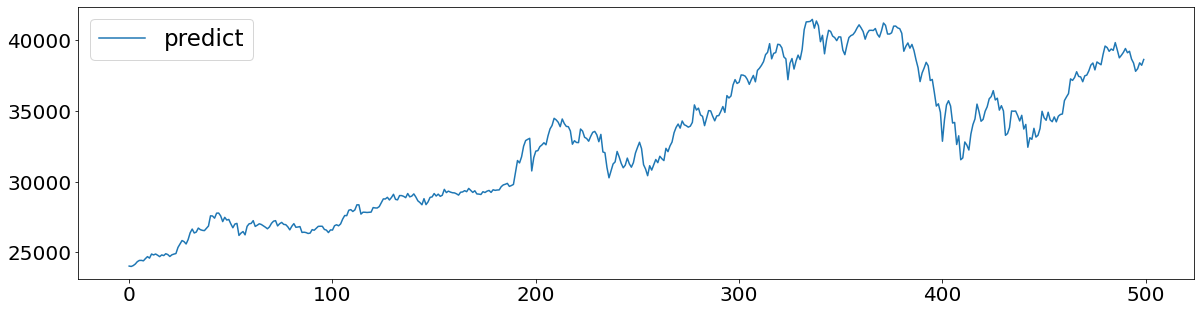

In [176]:
from sklearn.metrics import *

from matplotlib import pyplot
yhat = values[9100:9600,5]
plt.figure(figsize=(20,5))
pyplot.plot(yhat, label='predict')
pyplot.legend()
pyplot.show()

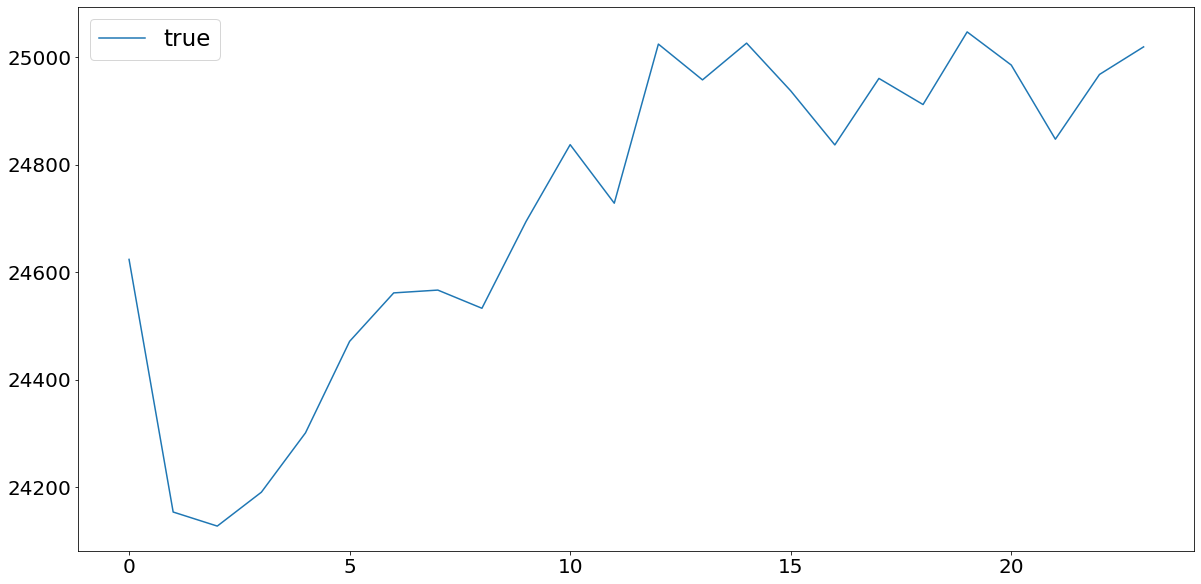

In [187]:
from sklearn.metrics import *

from matplotlib import pyplot
kk = btc_2_1
plt.figure(figsize=(20,10))
pyplot.plot(kk, label='true')
pyplot.legend()

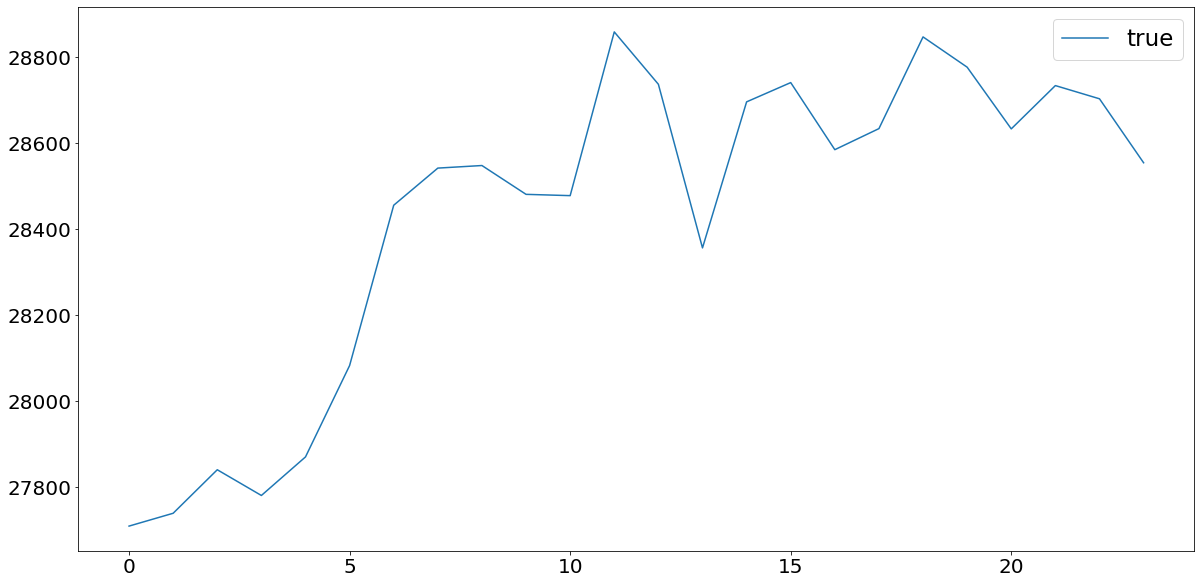

In [275]:
from sklearn.metrics import *

from matplotlib import pyplot
kkk=ttt[24*2]
plt.figure(figsize=(20,10))
pyplot.plot(kkk, label='true')
pyplot.legend()
pyplot.show()

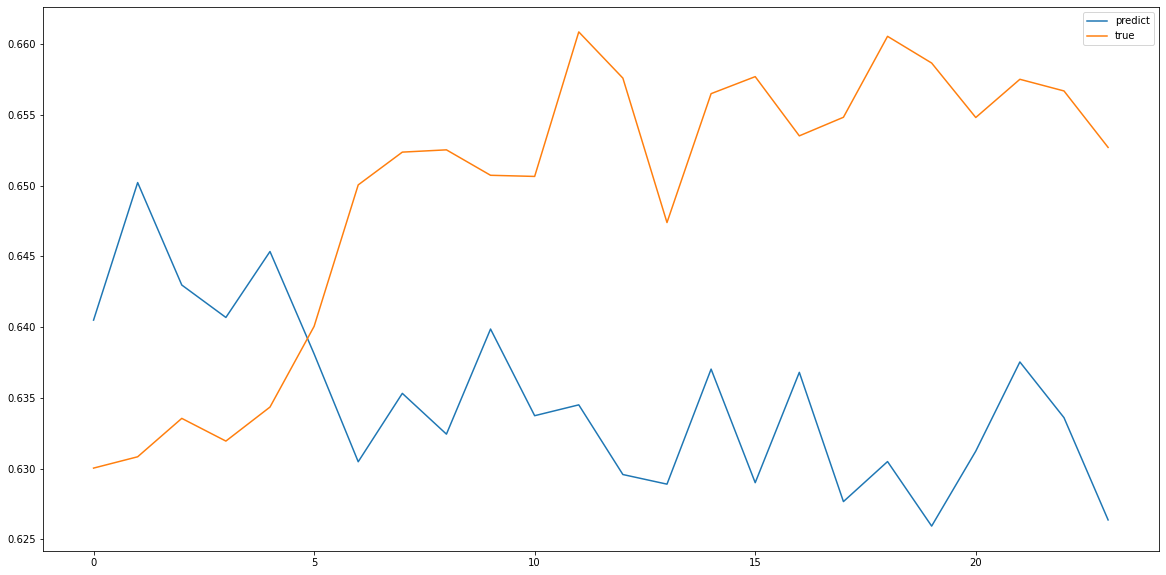

Test RMSE: 0.02088
Test MAE: 0.01943
Test MSE: 0.00044
Test RMSE: 164140017.81478
Test MAE: 152740336.00000


In [94]:
from sklearn.metrics import *

from matplotlib import pyplot
yhat = model.predict([testX])
plt.figure(figsize=(20,10))
yhat=yhat[24*2]
testy=testY[24*2]
testy=testy.reshape(-1,1)
pyplot.plot(yhat, label='predict')
pyplot.plot(testy, label='true')
pyplot.legend()
pyplot.show()

from math import *
rmse = sqrt(mean_squared_error(testy, yhat))
print('Test RMSE: %.5f' % rmse)

mae = mean_absolute_error(testy, yhat)
print('Test MAE: %.5f' % mae)

mse = mean_squared_error(testy, yhat)
print('Test MSE: %.5f' % mse)

yhat_inverse = yhat*(np.max(values)-np.min(values))+np.min(values)
testY_inverse=testy*(np.max(values)-np.min(values))+np.min(values)
rmse = sqrt(mean_squared_error(yhat_inverse, testY_inverse))
mae=mean_absolute_error(yhat_inverse, testY_inverse)
print('Test RMSE: %.5f' % rmse)
print('Test MAE: %.5f' % mae)

In [38]:
j = [12, 4, 0, 26, 29, 5, 31, 30, 24, 14, 10, 13, 19, 32, 3]

from math import *
from sklearn.metrics import *

non_aug_rm=[]
non_aug_ma=[]
non_aug_mp=[]
for k in j:

    yhat = model.predict([testX])
    yhat=yhat[24*k]
    testy=testY[24*k]
    yhat=yhat.reshape(-1,1)
    testy=testy.reshape(-1,1)
    rmse = sqrt(mean_squared_error(testy, yhat))
    mae = mean_absolute_error(testy, yhat)
    mape=mean_absolute_percentage_error(testy, np.array(yhat))
    print('Test MAPE: %.5f' % mape)
    print('Test MAE: %.5f' % mae)
    print('Test RMSE: %.5f' % rmse)
    non_aug_rm.append(rmse)
    non_aug_ma.append(mae)
    non_aug_mp.append(mape)


print(np.mean(non_aug_rm),np.std(non_aug_rm))
print(np.mean(non_aug_ma),np.std(non_aug_ma))
print(np.mean(non_aug_mp),np.std(non_aug_mp))

Test MAPE: 0.01395
Test MAE: 0.01347
Test RMSE: 0.01708
Test MAPE: 0.01697
Test MAE: 0.01134
Test RMSE: 0.01200
Test MAPE: 0.03148
Test MAE: 0.01869
Test RMSE: 0.02092
Test MAPE: 0.01079
Test MAE: 0.00812
Test RMSE: 0.00961
Test MAPE: 0.01838
Test MAE: 0.01357
Test RMSE: 0.01651
Test MAPE: 0.05212
Test MAE: 0.04071
Test RMSE: 0.04734
Test MAPE: 0.06536
Test MAE: 0.05416
Test RMSE: 0.07190
Test MAPE: 0.01564
Test MAE: 0.01125
Test RMSE: 0.01352
Test MAPE: 0.03917
Test MAE: 0.02810
Test RMSE: 0.03270
Test MAPE: 0.04160
Test MAE: 0.03419
Test RMSE: 0.03892
Test MAPE: 0.02943
Test MAE: 0.02803
Test RMSE: 0.03625
Test MAPE: 0.08506
Test MAE: 0.07203
Test RMSE: 0.08770
Test MAPE: 0.05015
Test MAE: 0.04197
Test RMSE: 0.04941
Test MAPE: 0.11524
Test MAE: 0.09239
Test RMSE: 0.10091
Test MAPE: 0.01005
Test MAE: 0.00662
Test RMSE: 0.00753
0.03748526300542627 0.028312485390331824
0.031643484 0.024332188
0.03969376 0.029202


## LSTM-CNN (1)

In [72]:
from tensorflow.keras.models import Model

first_input = Input(shape=(168,6))

in0=LSTM(64,return_sequences=True)(first_input)
#in1=add([first_input,in0])
in0=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)
#in1= BatchNormalization(scale=False)(in0)

in1=Conv1D(filters=64, kernel_size=2, activation='relu',padding='same')(in0)
#in1= BatchNormalization(scale=False)(in1)
#in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)

in1=Conv1D(filters=64, kernel_size=1, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in1)

#in1=add([in0,in1],name='extractor1')

#ad=Dropout(0.5)(ad)
#in0=LSTM(64,return_sequences=True)(ad)
#in1=add([first_input,in0])
in0=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in0)

in1=Conv1D(filters=64, kernel_size=2, activation='relu',padding='same')(in0)
#in1= BatchNormalization(scale=False)(in1)
#in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)

in1=Conv1D(filters=64, kernel_size=1, activation='relu',padding='same',name='extractor')(in1)
#in1= BatchNormalization(scale=False)(in1)

in1=Flatten()(in1)
in1=Dense(100, activation='relu')(in1)

in1=Dropout(0.5)(in1)
out=Dense(24,'relu')(in1)
model=tf.keras.Model(inputs=[first_input],outputs=[out])
model.compile(optimizer='adam', loss='mse')

checkpoint_path = "saved_weights/btc_lstmcnn_mulstep.hdf5"
cb = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_best_only=True,
                                        monitor='val_loss',mode='min',
                                                 verbose=1)

# history=model.fit(trainX, trainY, epochs=100, batch_size=100, validation_data=(valX, valY), verbose=1, callbacks=[cb])

In [73]:
model.load_weights("saved_weights/btc_lstmcnn_mulstep.hdf5")

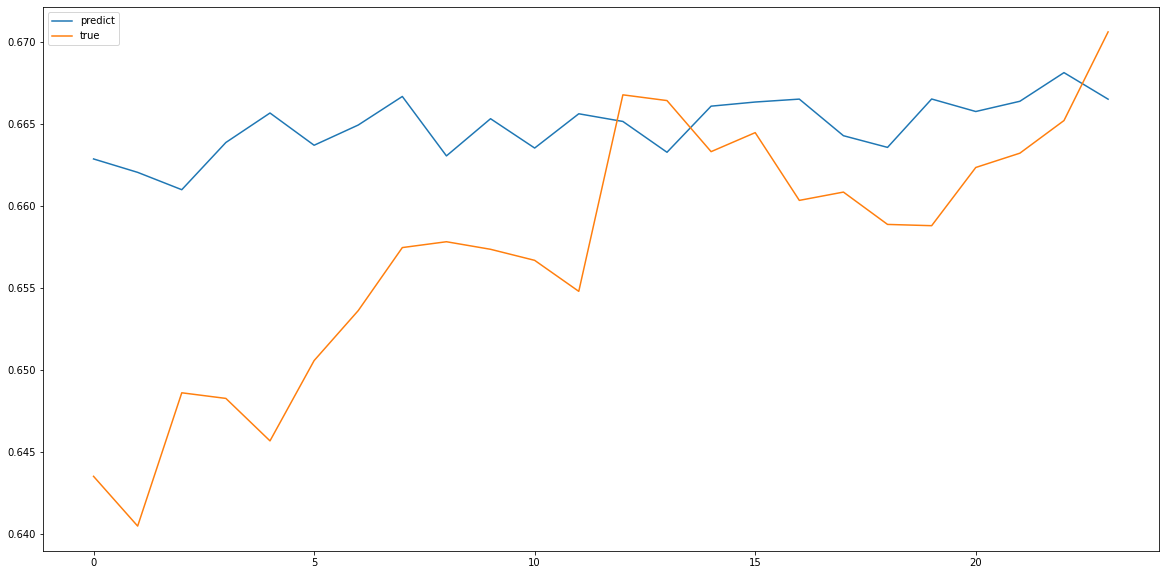

Test RMSE: 0.01018
Test MAE: 0.00828
Test MSE: 0.00010
Test RMSE: 79987137.70296
Test MAE: 65088000.00000


In [74]:
from sklearn.metrics import *

from matplotlib import pyplot
yhat = model.predict([testX])
plt.figure(figsize=(20,10))
yhat=yhat[24*3]
testy=testY[24*3]
testy=testy.reshape(-1,1)
pyplot.plot(yhat, label='predict')
pyplot.plot(testy, label='true')
pyplot.legend()
pyplot.show()

from math import *
rmse = sqrt(mean_squared_error(testy, yhat))
print('Test RMSE: %.5f' % rmse)

mae = mean_absolute_error(testy, yhat)
print('Test MAE: %.5f' % mae)

mse = mean_squared_error(testy, yhat)
print('Test MSE: %.5f' % mse)

yhat_inverse = yhat*(np.max(values)-np.min(values))+np.min(values)
testY_inverse=testy*(np.max(values)-np.min(values))+np.min(values)
rmse = sqrt(mean_squared_error(yhat_inverse, testY_inverse))
mae=mean_absolute_error(yhat_inverse, testY_inverse)
print('Test RMSE: %.5f' % rmse)
print('Test MAE: %.5f' % mae)

In [75]:
from math import *
from sklearn.metrics import *

non_aug_rm=[]
non_aug_ma=[]
non_aug_mp=[]
for k in j:

    yhat = model.predict([testX])
    yhat=yhat[24*k]
    testy=testY[24*k]
    yhat=yhat.reshape(-1,1)
    testy=testy.reshape(-1,1)
    rmse = sqrt(mean_squared_error(testy, yhat))
    
    mae = mean_absolute_error(testy, yhat)
    
    mape=mean_absolute_percentage_error(testy, np.array(yhat))
    print('Test MAPE: %.5f' % mape)
    print('Test MAE: %.5f' % mae)
    print('Test RMSE: %.5f' % rmse)
    non_aug_rm.append(rmse)
    non_aug_ma.append(mae)
    non_aug_mp.append(mape)


print(np.mean(non_aug_rm),np.std(non_aug_rm))
print(np.mean(non_aug_ma),np.std(non_aug_ma))
print(np.mean(non_aug_mp),np.std(non_aug_mp))

Test MAPE: 0.01415
Test MAE: 0.01366
Test RMSE: 0.01709
Test MAPE: 0.01308
Test MAE: 0.00875
Test RMSE: 0.01070
Test MAPE: 0.01448
Test MAE: 0.00858
Test RMSE: 0.01063
Test MAPE: 0.01542
Test MAE: 0.01145
Test RMSE: 0.01344
Test MAPE: 0.01467
Test MAE: 0.01070
Test RMSE: 0.01354
Test MAPE: 0.08761
Test MAE: 0.06792
Test RMSE: 0.07278
Test MAPE: 0.06683
Test MAE: 0.05537
Test RMSE: 0.07341
Test MAPE: 0.01380
Test MAE: 0.00982
Test RMSE: 0.01104
Test MAPE: 0.04585
Test MAE: 0.03295
Test RMSE: 0.03705
Test MAPE: 0.03354
Test MAE: 0.02668
Test RMSE: 0.03262
Test MAPE: 0.02556
Test MAE: 0.02442
Test RMSE: 0.03340
Test MAPE: 0.10681
Test MAE: 0.09122
Test RMSE: 0.10318
Test MAPE: 0.05380
Test MAE: 0.04512
Test RMSE: 0.05131
Test MAPE: 0.09697
Test MAE: 0.07778
Test RMSE: 0.08490
Test MAPE: 0.01270
Test MAE: 0.00828
Test RMSE: 0.01018
0.03835130296153242 0.030299738656952097
0.03284727 0.027132224
0.04101809 0.032533072


## LSTM-CNN (2)

In [34]:
from tensorflow.keras.models import Model

first_input = Input(shape=(168,6))

in0=LSTM(64,return_sequences=True)(first_input)
#in1=add([first_input,in0])
in0=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)
#in1= BatchNormalization(scale=False)(in0)

in1=Conv1D(filters=64, kernel_size=2, activation='relu',padding='same')(in0)
#in1= BatchNormalization(scale=False)(in1)
#in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)

in1=Conv1D(filters=64, kernel_size=1, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in1)

#in1=add([in0,in1],name='extractor1')

#ad=Dropout(0.5)(ad)
#in0=LSTM(64,return_sequences=True)(ad)
#in1=add([first_input,in0])
in0=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in0)

in1=Conv1D(filters=64, kernel_size=2, activation='relu',padding='same')(in0)
#in1= BatchNormalization(scale=False)(in1)
#in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)

in1=Conv1D(filters=64, kernel_size=1, activation='relu',padding='same',name='extractor')(in1)
#in1= BatchNormalization(scale=False)(in1)

in1=Flatten()(in1)
in1=Dense(100, activation='relu')(in1)

in1=Dropout(0.5)(in1)
out=Dense(24,'relu')(in1)
model=tf.keras.Model(inputs=[first_input],outputs=[out])
model.compile(optimizer='adam', loss='mse')

checkpoint_path = "saved_weights/btc_lstmcnn_mulstep_2.hdf5"
cb = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_best_only=True,
                                        monitor='val_loss',mode='min',
                                                 verbose=1)

# history=model.fit(trainX, trainY, epochs=100, batch_size=100, validation_data=(valX, valY), verbose=1, callbacks=[cb])

2022-07-22 11:46:37.151847: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-22 11:46:37.377545: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
79/79 [==============================] - 7s 75ms/step - loss: 0.0040 - val_loss: 0.0022

Epoch 00001: val_loss improved from inf to 0.00220, saving model to saved_weights/btc_lstmcnn_mulstep_2.hdf5
Epoch 2/100
79/79 [==============================] - 6s 70ms/step - loss: 9.3298e-04 - val_loss: 0.0029

Epoch 00002: val_loss did not improve from 0.00220
Epoch 3/100
79/79 [==============================] - 5s 69ms/step - loss: 5.8586e-04 - val_loss: 0.0016

Epoch 00003: val_loss improved from 0.00220 to 0.00164, saving model to saved_weights/btc_lstmcnn_mulstep_2.hdf5
Epoch 4/100
79/79 [==============================] - 5s 69ms/step - loss: 4.6492e-04 - val_loss: 6.0649e-04

Epoch 00004: val_loss improved from 0.00164 to 0.00061, saving model to saved_weights/btc_lstmcnn_mulstep_2.hdf5
Epoch 5/100
79/79 [==============================] - 5s 69ms/step - loss: 3.8996e-04 - val_loss: 5.3816e-04

Epoch 00005: val_loss improved from 0.00061 to 0.00054, saving model to saved_weights

79/79 [==============================] - 6s 71ms/step - loss: 1.4549e-04 - val_loss: 3.5207e-04

Epoch 00048: val_loss did not improve from 0.00019
Epoch 49/100
79/79 [==============================] - 6s 71ms/step - loss: 1.4114e-04 - val_loss: 2.0103e-04

Epoch 00049: val_loss did not improve from 0.00019
Epoch 50/100
79/79 [==============================] - 6s 71ms/step - loss: 1.4463e-04 - val_loss: 2.9031e-04

Epoch 00050: val_loss did not improve from 0.00019
Epoch 51/100
79/79 [==============================] - 6s 71ms/step - loss: 1.5772e-04 - val_loss: 2.6407e-04

Epoch 00051: val_loss did not improve from 0.00019
Epoch 52/100
79/79 [==============================] - 6s 71ms/step - loss: 1.4306e-04 - val_loss: 6.8482e-04

Epoch 00052: val_loss did not improve from 0.00019
Epoch 53/100
79/79 [==============================] - 6s 71ms/step - loss: 1.3848e-04 - val_loss: 4.1677e-04

Epoch 00053: val_loss did not improve from 0.00019
Epoch 54/100
79/79 [===========================

79/79 [==============================] - 6s 71ms/step - loss: 1.3216e-04 - val_loss: 5.2879e-04

Epoch 00097: val_loss did not improve from 0.00017
Epoch 98/100
79/79 [==============================] - 6s 71ms/step - loss: 1.4183e-04 - val_loss: 9.2810e-04

Epoch 00098: val_loss did not improve from 0.00017
Epoch 99/100
79/79 [==============================] - 6s 71ms/step - loss: 1.3127e-04 - val_loss: 1.7183e-04

Epoch 00099: val_loss improved from 0.00017 to 0.00017, saving model to saved_weights/btc_lstmcnn_mulstep_2.hdf5
Epoch 100/100
79/79 [==============================] - 6s 71ms/step - loss: 1.2882e-04 - val_loss: 3.2098e-04

Epoch 00100: val_loss did not improve from 0.00017


In [35]:
model.load_weights("saved_weights/btc_lstmcnn_mulstep_2.hdf5")

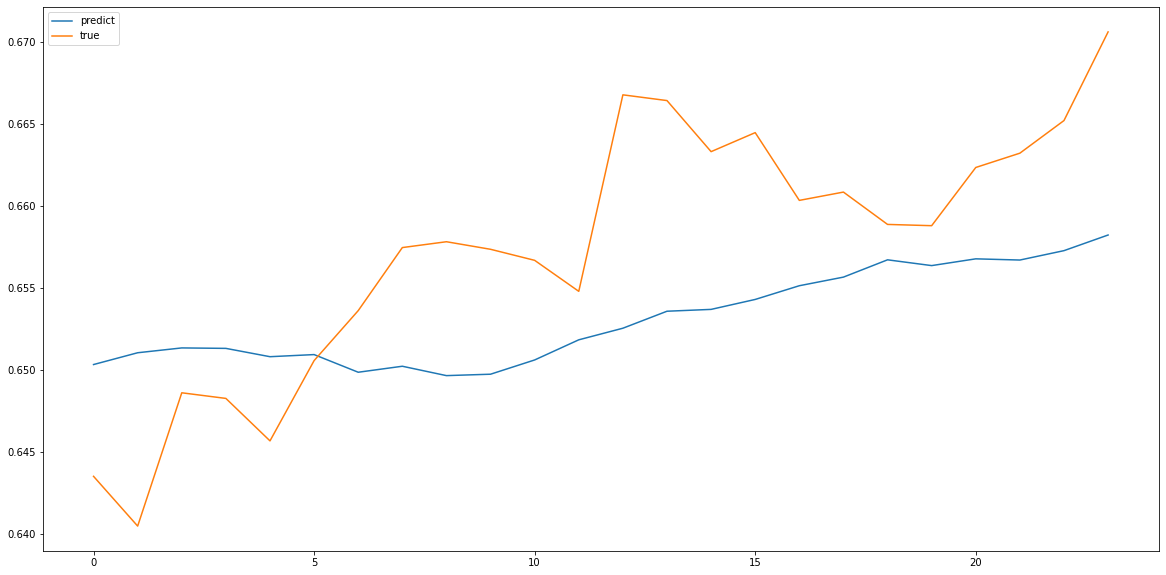

Test RMSE: 0.00753
Test MAE: 0.00662
Test MSE: 0.00006
Test RMSE: 59157666.84965
Test MAE: 52049748.00000


In [36]:
from sklearn.metrics import *

from matplotlib import pyplot
yhat = model.predict([testX])
plt.figure(figsize=(20,10))
yhat=yhat[24*3]
testy=testY[24*3]
testy=testy.reshape(-1,1)
pyplot.plot(yhat, label='predict')
pyplot.plot(testy, label='true')
pyplot.legend()
pyplot.show()

from math import *
rmse = sqrt(mean_squared_error(testy, yhat))
print('Test RMSE: %.5f' % rmse)

mae = mean_absolute_error(testy, yhat)
print('Test MAE: %.5f' % mae)

mse = mean_squared_error(testy, yhat)
print('Test MSE: %.5f' % mse)

yhat_inverse = yhat*(np.max(values)-np.min(values))+np.min(values)
testY_inverse=testy*(np.max(values)-np.min(values))+np.min(values)
rmse = sqrt(mean_squared_error(yhat_inverse, testY_inverse))
mae=mean_absolute_error(yhat_inverse, testY_inverse)
print('Test RMSE: %.5f' % rmse)
from math import *
from sklearn.metrics import *

non_aug_rm=[]
non_aug_ma=[]
non_aug_mp=[]
for k in j:

    yhat = model.predict([testX])
    yhat=yhat[24*k]
    testy=testY[24*k]
    yhat=yhat.reshape(-1,1)
    testy=testy.reshape(-1,1)
    rmse = sqrt(mean_squared_error(testy, yhat))
    
    mae = mean_absolute_error(testy, yhat)
    
    mape=mean_absolute_percentage_error(testy, np.array(yhat))
    print('Test MAPE: %.5f' % mape)
    print('Test MAE: %.5f' % mae)
    print('Test RMSE: %.5f' % rmse)
    non_aug_rm.append(rmse)
    non_aug_ma.append(mae)
    non_aug_mp.append(mape)


print(np.mean(non_aug_rm),np.std(non_aug_rm))
print(np.mean(non_aug_ma),np.std(non_aug_ma))
print(np.mean(non_aug_mp),np.std(non_aug_mp))print('Test MAE: %.5f' % mae)

In [39]:


from math import *
from sklearn.metrics import *

non_aug_rm=[]
non_aug_ma=[]
non_aug_mp=[]
for k in j:

    yhat = model.predict([testX])
    yhat=yhat[24*k]
    testy=testY[24*k]
    yhat=yhat.reshape(-1,1)
    testy=testy.reshape(-1,1)
    rmse = sqrt(mean_squared_error(testy, yhat))
    
    mae = mean_absolute_error(testy, yhat)
    
    mape=mean_absolute_percentage_error(testy, np.array(yhat))
    print('Test MAPE: %.5f' % mape)
    print('Test MAE: %.5f' % mae)
    print('Test RMSE: %.5f' % rmse)
    non_aug_rm.append(rmse)
    non_aug_ma.append(mae)
    non_aug_mp.append(mape)


print(np.mean(non_aug_rm),np.std(non_aug_rm))
print(np.mean(non_aug_ma),np.std(non_aug_ma))
print(np.mean(non_aug_mp),np.std(non_aug_mp))

Test MAPE: 0.01395
Test MAE: 0.01347
Test RMSE: 0.01708
Test MAPE: 0.01697
Test MAE: 0.01134
Test RMSE: 0.01200
Test MAPE: 0.03148
Test MAE: 0.01869
Test RMSE: 0.02092
Test MAPE: 0.01079
Test MAE: 0.00812
Test RMSE: 0.00961
Test MAPE: 0.01838
Test MAE: 0.01357
Test RMSE: 0.01651
Test MAPE: 0.05212
Test MAE: 0.04071
Test RMSE: 0.04734
Test MAPE: 0.06536
Test MAE: 0.05416
Test RMSE: 0.07190
Test MAPE: 0.01564
Test MAE: 0.01125
Test RMSE: 0.01352
Test MAPE: 0.03917
Test MAE: 0.02810
Test RMSE: 0.03270
Test MAPE: 0.04160
Test MAE: 0.03419
Test RMSE: 0.03892
Test MAPE: 0.02943
Test MAE: 0.02803
Test RMSE: 0.03625
Test MAPE: 0.08506
Test MAE: 0.07203
Test RMSE: 0.08770
Test MAPE: 0.05015
Test MAE: 0.04197
Test RMSE: 0.04941
Test MAPE: 0.11524
Test MAE: 0.09239
Test RMSE: 0.10091
Test MAPE: 0.01005
Test MAE: 0.00662
Test RMSE: 0.00753
0.03748526300542627 0.028312485390331824
0.031643484 0.024332188
0.03969376 0.029202


## LSTM-resCNN (1)

In [76]:
from tensorflow.keras.models import Model

first_input = Input(shape=(168,6))

in0=LSTM(64,return_sequences=True)(first_input)
#in1=add([first_input,in0])
in0=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)
#in1= BatchNormalization(scale=False)(in0)

in1=Conv1D(filters=64, kernel_size=2, activation='relu',padding='same')(in0)
#in1= BatchNormalization(scale=False)(in1)
#in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)

in1=Conv1D(filters=64, kernel_size=1, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in1)

in1=add([in0,in1],name='extractor1')

#ad=Dropout(0.5)(ad)
#in0=LSTM(64,return_sequences=True)(ad)
#in1=add([first_input,in0])
in0=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in0)

in1=Conv1D(filters=64, kernel_size=2, activation='relu',padding='same')(in0)
#in1= BatchNormalization(scale=False)(in1)
#in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)

in1=Conv1D(filters=64, kernel_size=1, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in1)

in1=add([in0,in1],name='extractor')


in1=Flatten()(in1)
in1=Dense(100, activation='relu')(in1)
in1=Dropout(0.5)(in1)

out=Dense(24,'relu')(in1)
model=tf.keras.Model(inputs=[first_input],outputs=[out])
model.compile(optimizer='adam', loss='mse')

checkpoint_path = "saved_weights/btc_lstmrescnn_mulstep.hdf5"
cb = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_best_only=True,
                                        monitor='val_loss',mode='min',
                                                 verbose=1)

history=model.fit(trainX, trainY, epochs=100, batch_size=100, validation_data=(valX, valY), verbose=1, callbacks=[cb])

Epoch 1/100
79/79 [==============================] - 7s 75ms/step - loss: 0.0050 - val_loss: 0.0016

Epoch 00001: val_loss improved from inf to 0.00159, saving model to saved_weights/btc_lstmrescnn_mulstep.hdf5
Epoch 2/100
 2/79 [..............................] - ETA: 5s - loss: 0.0013

/home/yr19/anaconda3/envs/time/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


79/79 [==============================] - 6s 72ms/step - loss: 9.9156e-04 - val_loss: 0.0010

Epoch 00002: val_loss improved from 0.00159 to 0.00102, saving model to saved_weights/btc_lstmrescnn_mulstep.hdf5
Epoch 3/100
79/79 [==============================] - 6s 74ms/step - loss: 6.1103e-04 - val_loss: 0.0014

Epoch 00003: val_loss did not improve from 0.00102
Epoch 4/100
79/79 [==============================] - 6s 75ms/step - loss: 4.7884e-04 - val_loss: 0.0026

Epoch 00004: val_loss did not improve from 0.00102
Epoch 5/100
79/79 [==============================] - 6s 74ms/step - loss: 4.0949e-04 - val_loss: 6.0087e-04

Epoch 00005: val_loss improved from 0.00102 to 0.00060, saving model to saved_weights/btc_lstmrescnn_mulstep.hdf5
Epoch 6/100
79/79 [==============================] - 6s 71ms/step - loss: 3.5307e-04 - val_loss: 5.7899e-04

Epoch 00006: val_loss improved from 0.00060 to 0.00058, saving model to saved_weights/btc_lstmrescnn_mulstep.hdf5
Epoch 7/100
79/79 [================

79/79 [==============================] - 6s 73ms/step - loss: 1.6678e-04 - val_loss: 2.4963e-04

Epoch 00048: val_loss did not improve from 0.00020
Epoch 49/100
79/79 [==============================] - 6s 72ms/step - loss: 1.6304e-04 - val_loss: 7.5076e-04

Epoch 00049: val_loss did not improve from 0.00020
Epoch 50/100
79/79 [==============================] - 6s 73ms/step - loss: 1.5886e-04 - val_loss: 3.0397e-04

Epoch 00050: val_loss did not improve from 0.00020
Epoch 51/100
79/79 [==============================] - 6s 72ms/step - loss: 1.6083e-04 - val_loss: 1.9488e-04

Epoch 00051: val_loss improved from 0.00020 to 0.00019, saving model to saved_weights/btc_lstmrescnn_mulstep.hdf5
Epoch 52/100
79/79 [==============================] - 6s 72ms/step - loss: 1.6337e-04 - val_loss: 3.1635e-04

Epoch 00052: val_loss did not improve from 0.00019
Epoch 53/100
79/79 [==============================] - 6s 72ms/step - loss: 1.7052e-04 - val_loss: 2.8656e-04

Epoch 00053: val_loss did not impro

79/79 [==============================] - 6s 73ms/step - loss: 1.5463e-04 - val_loss: 3.7792e-04

Epoch 00097: val_loss did not improve from 0.00018
Epoch 98/100
79/79 [==============================] - 6s 73ms/step - loss: 1.6083e-04 - val_loss: 1.9252e-04

Epoch 00098: val_loss did not improve from 0.00018
Epoch 99/100
79/79 [==============================] - 6s 72ms/step - loss: 1.4814e-04 - val_loss: 1.9380e-04

Epoch 00099: val_loss did not improve from 0.00018
Epoch 100/100
79/79 [==============================] - 6s 74ms/step - loss: 1.5345e-04 - val_loss: 3.3038e-04

Epoch 00100: val_loss did not improve from 0.00018


In [77]:
model.load_weights("saved_weights/btc_lstmrescnn_mulstep.hdf5")

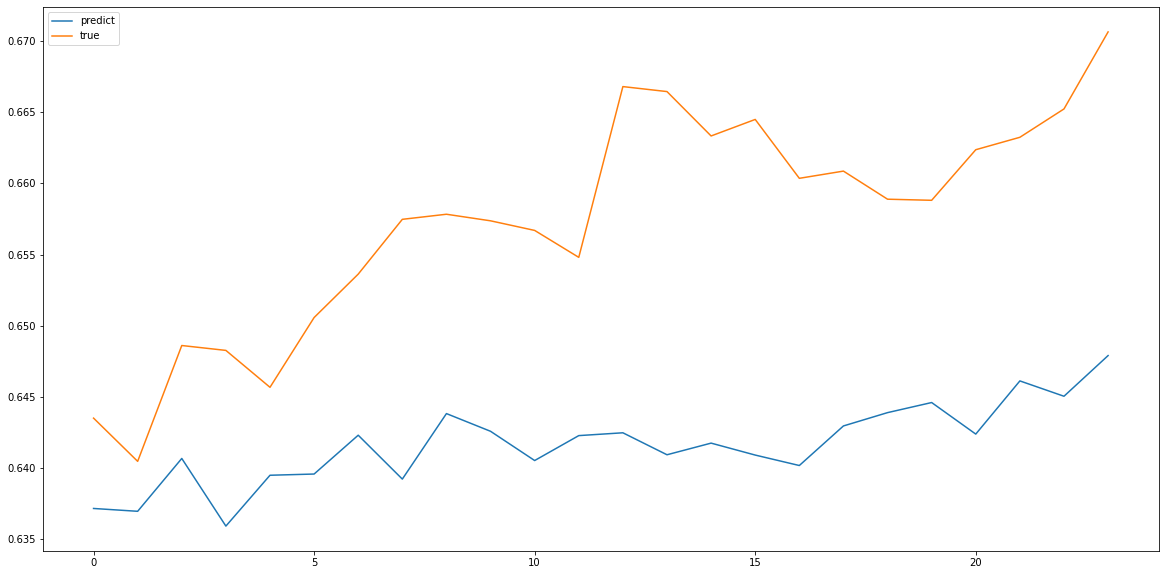

Test RMSE: 0.01678
Test MAE: 0.01570
Test MSE: 0.00028
Test RMSE: 131883506.41908
Test MAE: 123359656.00000


In [78]:
from sklearn.metrics import *

from matplotlib import pyplot
yhat = model.predict([testX])
plt.figure(figsize=(20,10))
yhat=yhat[24*3]
testy=testY[24*3]
testy=testy.reshape(-1,1)
pyplot.plot(yhat, label='predict')
pyplot.plot(testy, label='true')
pyplot.legend()
pyplot.show()

from math import *
rmse = sqrt(mean_squared_error(testy, yhat))
print('Test RMSE: %.5f' % rmse)

mae = mean_absolute_error(testy, yhat)
print('Test MAE: %.5f' % mae)

mse = mean_squared_error(testy, yhat)
print('Test MSE: %.5f' % mse)

yhat_inverse = yhat*(np.max(values)-np.min(values))+np.min(values)
testY_inverse=testy*(np.max(values)-np.min(values))+np.min(values)
rmse = sqrt(mean_squared_error(yhat_inverse, testY_inverse))
mae=mean_absolute_error(yhat_inverse, testY_inverse)
print('Test RMSE: %.5f' % rmse)
print('Test MAE: %.5f' % mae)

In [79]:
from math import *
from sklearn.metrics import *

non_aug_rm=[]
non_aug_ma=[]
non_aug_mp=[]
for k in j:

    yhat = model.predict([testX])
    yhat=yhat[24*k]
    testy=testY[24*k]
    yhat=yhat.reshape(-1,1)
    testy=testy.reshape(-1,1)
    rmse = sqrt(mean_squared_error(testy, yhat))
    
    mae = mean_absolute_error(testy, yhat)
    
    mape=mean_absolute_percentage_error(testy, np.array(yhat))
    print('Test MAPE: %.5f' % mape)
    print('Test MAE: %.5f' % mae)
    print('Test RMSE: %.5f' % rmse)
    non_aug_rm.append(rmse)
    non_aug_ma.append(mae)
    non_aug_mp.append(mape)


print(np.mean(non_aug_rm),np.std(non_aug_rm))
print(np.mean(non_aug_ma),np.std(non_aug_ma))
print(np.mean(non_aug_mp),np.std(non_aug_mp))

Test MAPE: 0.01587
Test MAE: 0.01534
Test RMSE: 0.01943
Test MAPE: 0.01286
Test MAE: 0.00869
Test RMSE: 0.01139
Test MAPE: 0.01289
Test MAE: 0.00769
Test RMSE: 0.00893
Test MAPE: 0.02908
Test MAE: 0.02182
Test RMSE: 0.02310
Test MAPE: 0.01503
Test MAE: 0.01101
Test RMSE: 0.01386
Test MAPE: 0.09614
Test MAE: 0.07441
Test RMSE: 0.07864
Test MAPE: 0.10598
Test MAE: 0.08608
Test RMSE: 0.09828
Test MAPE: 0.01707
Test MAE: 0.01229
Test RMSE: 0.01475
Test MAPE: 0.01993
Test MAE: 0.01431
Test RMSE: 0.01874
Test MAPE: 0.05091
Test MAE: 0.04210
Test RMSE: 0.04895
Test MAPE: 0.09081
Test MAE: 0.08529
Test RMSE: 0.08805
Test MAPE: 0.06342
Test MAE: 0.05378
Test RMSE: 0.06627
Test MAPE: 0.03039
Test MAE: 0.02548
Test RMSE: 0.03098
Test MAPE: 0.08616
Test MAE: 0.06921
Test RMSE: 0.07526
Test MAPE: 0.02378
Test MAE: 0.01570
Test RMSE: 0.01678
0.0408941470493903 0.03064408311006257
0.036214832 0.028546268
0.04468721 0.033302408


## LSTM-CNN (2)

In [80]:
from tensorflow.keras.models import Model

first_input = Input(shape=(168,6))

in0=LSTM(64,return_sequences=True)(first_input)
#in1=add([first_input,in0])
in0=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)
#in1= BatchNormalization(scale=False)(in0)

in1=Conv1D(filters=64, kernel_size=2, activation='relu',padding='same')(in0)
#in1= BatchNormalization(scale=False)(in1)
#in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)

in1=Conv1D(filters=64, kernel_size=1, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in1)

in1=add([in0,in1],name='extractor1')

#ad=Dropout(0.5)(ad)
#in0=LSTM(64,return_sequences=True)(ad)
#in1=add([first_input,in0])
in0=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in0)

in1=Conv1D(filters=64, kernel_size=2, activation='relu',padding='same')(in0)
#in1= BatchNormalization(scale=False)(in1)
#in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)

in1=Conv1D(filters=64, kernel_size=1, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in1)

in1=add([in0,in1],name='extractor')


in1=Flatten()(in1)
in1=Dense(100, activation='relu')(in1)
in1=Dropout(0.5)(in1)

out=Dense(24,'relu')(in1)
model=tf.keras.Model(inputs=[first_input],outputs=[out])
model.compile(optimizer='adam', loss='mse')

checkpoint_path = "saved_weights/btc_lstmrescnn_mulstep_2.hdf5"
cb = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_best_only=True,
                                        monitor='val_loss',mode='min',
                                                 verbose=1)

history=model.fit(trainX, trainY, epochs=100, batch_size=100, validation_data=(valX, valY), verbose=1, callbacks=[cb])

Epoch 1/100
79/79 [==============================] - 7s 76ms/step - loss: 0.0059 - val_loss: 0.0019

Epoch 00001: val_loss improved from inf to 0.00190, saving model to saved_weights/btc_lstmrescnn_mulstep_2.hdf5
Epoch 2/100


/home/yr19/anaconda3/envs/time/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


79/79 [==============================] - 6s 71ms/step - loss: 0.0012 - val_loss: 0.0013

Epoch 00002: val_loss improved from 0.00190 to 0.00128, saving model to saved_weights/btc_lstmrescnn_mulstep_2.hdf5
Epoch 3/100
79/79 [==============================] - 6s 72ms/step - loss: 7.0526e-04 - val_loss: 0.0010

Epoch 00003: val_loss improved from 0.00128 to 0.00102, saving model to saved_weights/btc_lstmrescnn_mulstep_2.hdf5
Epoch 4/100
79/79 [==============================] - 6s 72ms/step - loss: 5.2266e-04 - val_loss: 0.0013

Epoch 00004: val_loss did not improve from 0.00102
Epoch 5/100
79/79 [==============================] - 6s 73ms/step - loss: 4.3678e-04 - val_loss: 6.3450e-04

Epoch 00005: val_loss improved from 0.00102 to 0.00063, saving model to saved_weights/btc_lstmrescnn_mulstep_2.hdf5
Epoch 6/100
79/79 [==============================] - 6s 73ms/step - loss: 3.7461e-04 - val_loss: 6.3721e-04

Epoch 00006: val_loss did not improve from 0.00063
Epoch 7/100
79/79 [==============


Epoch 00049: val_loss did not improve from 0.00020
Epoch 50/100
79/79 [==============================] - 6s 72ms/step - loss: 2.0872e-04 - val_loss: 7.9652e-04

Epoch 00050: val_loss did not improve from 0.00020
Epoch 51/100
79/79 [==============================] - 6s 72ms/step - loss: 2.1372e-04 - val_loss: 3.7543e-04

Epoch 00051: val_loss did not improve from 0.00020
Epoch 52/100
79/79 [==============================] - 6s 74ms/step - loss: 2.1458e-04 - val_loss: 7.0608e-04

Epoch 00052: val_loss did not improve from 0.00020
Epoch 53/100
79/79 [==============================] - 6s 74ms/step - loss: 2.0601e-04 - val_loss: 5.2016e-04

Epoch 00053: val_loss did not improve from 0.00020
Epoch 54/100
79/79 [==============================] - 6s 75ms/step - loss: 2.0505e-04 - val_loss: 3.8172e-04

Epoch 00054: val_loss did not improve from 0.00020
Epoch 55/100
79/79 [==============================] - 6s 75ms/step - loss: 2.0662e-04 - val_loss: 0.0013

Epoch 00055: val_loss did not improve


Epoch 00098: val_loss did not improve from 0.00018
Epoch 99/100
79/79 [==============================] - 6s 76ms/step - loss: 2.0314e-04 - val_loss: 2.6343e-04

Epoch 00099: val_loss did not improve from 0.00018
Epoch 100/100
79/79 [==============================] - 6s 73ms/step - loss: 1.9188e-04 - val_loss: 7.0413e-04

Epoch 00100: val_loss did not improve from 0.00018


In [81]:
model.load_weights("saved_weights/btc_lstmrescnn_mulstep_2.hdf5")

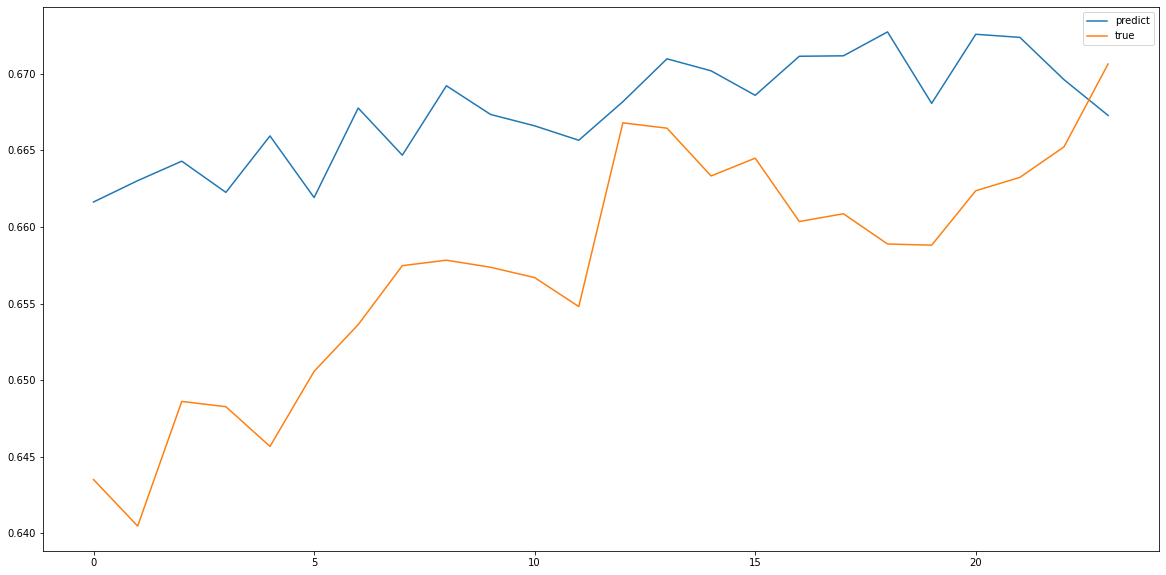

Test RMSE: 0.01176
Test MAE: 0.01057
Test MSE: 0.00014
Test RMSE: 92462613.00127
Test MAE: 83073512.00000


In [82]:
from sklearn.metrics import *

from matplotlib import pyplot
yhat = model.predict([testX])
plt.figure(figsize=(20,10))
yhat=yhat[24*3]
testy=testY[24*3]
testy=testy.reshape(-1,1)
pyplot.plot(yhat, label='predict')
pyplot.plot(testy, label='true')
pyplot.legend()
pyplot.show()

from math import *
rmse = sqrt(mean_squared_error(testy, yhat))
print('Test RMSE: %.5f' % rmse)

mae = mean_absolute_error(testy, yhat)
print('Test MAE: %.5f' % mae)

mse = mean_squared_error(testy, yhat)
print('Test MSE: %.5f' % mse)

yhat_inverse = yhat*(np.max(values)-np.min(values))+np.min(values)
testY_inverse=testy*(np.max(values)-np.min(values))+np.min(values)
rmse = sqrt(mean_squared_error(yhat_inverse, testY_inverse))
mae=mean_absolute_error(yhat_inverse, testY_inverse)
print('Test RMSE: %.5f' % rmse)
print('Test MAE: %.5f' % mae)

In [83]:
from math import *
from sklearn.metrics import *

non_aug_rm=[]
non_aug_ma=[]
non_aug_mp=[]
for k in j:

    yhat = model.predict([testX])
    yhat=yhat[24*k]
    testy=testY[24*k]
    yhat=yhat.reshape(-1,1)
    testy=testy.reshape(-1,1)
    rmse = sqrt(mean_squared_error(testy, yhat))
    
    mae = mean_absolute_error(testy, yhat)
    
    mape=mean_absolute_percentage_error(testy, np.array(yhat))
    print('Test MAPE: %.5f' % mape)
    print('Test MAE: %.5f' % mae)
    print('Test RMSE: %.5f' % rmse)
    non_aug_rm.append(rmse)
    non_aug_ma.append(mae)
    non_aug_mp.append(mape)


print(np.mean(non_aug_rm),np.std(non_aug_rm))
print(np.mean(non_aug_ma),np.std(non_aug_ma))
print(np.mean(non_aug_mp),np.std(non_aug_mp))

Test MAPE: 0.10339
Test MAE: 0.10037
Test RMSE: 0.10096
Test MAPE: 0.02844
Test MAE: 0.01899
Test RMSE: 0.01953
Test MAPE: 0.03613
Test MAE: 0.02146
Test RMSE: 0.02371
Test MAPE: 0.02045
Test MAE: 0.01522
Test RMSE: 0.01684
Test MAPE: 0.05918
Test MAE: 0.04326
Test RMSE: 0.04544
Test MAPE: 0.05789
Test MAE: 0.04515
Test RMSE: 0.05169
Test MAPE: 0.04674
Test MAE: 0.03928
Test RMSE: 0.05926
Test MAPE: 0.03007
Test MAE: 0.02128
Test RMSE: 0.02350
Test MAPE: 0.07408
Test MAE: 0.05346
Test RMSE: 0.05649
Test MAPE: 0.03291
Test MAE: 0.02588
Test RMSE: 0.03323
Test MAPE: 0.07439
Test MAE: 0.07001
Test RMSE: 0.07396
Test MAPE: 0.08282
Test MAE: 0.07008
Test RMSE: 0.08603
Test MAPE: 0.08131
Test MAE: 0.06845
Test RMSE: 0.07356
Test MAPE: 0.13378
Test MAE: 0.10746
Test RMSE: 0.11562
Test MAPE: 0.01617
Test MAE: 0.01057
Test RMSE: 0.01176
0.052773546815972745 0.031123973060259453
0.047394376 0.029466515
0.058516566 0.032182783


## CNN-LSTM (1)

In [48]:
from tensorflow.keras.models import Model

first_input = Input(shape=(168,6))

in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(first_input)
#in1= BatchNormalization(scale=False)(in1)

in1=Conv1D(filters=64, kernel_size=2, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in1)
#in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in1)

in1=Conv1D(filters=64, kernel_size=1, activation='relu',padding='same')(in1)
in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in1)

in1=Conv1D(filters=64, kernel_size=2, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in1)
#in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in1)

in1=Conv1D(filters=64, kernel_size=1, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in1)

#in1=add([in0,in1],name='extractor')
#attn_layer = AttentionLayer(name='attention_layer')
#attn_out, attn_states = attn_layer([in1,in1])

    # Concat attention input and LSTM output, in original code it was decoder LSTM
#concat_out = Concatenate(axis=-1, name='concat_layer')([in1, attn_out])
in1=MaxPooling1D(pool_size=2, name='extractor')(in1)
#in1=Dropout(0.5)(in1)
#in1=Flatten()(in1)
#in1=Dense(100, activation='relu')(in1)
in1=LSTM(100)(in1)
in1=Dense(100)(in1)
in1=Dropout(0.5)(in1)
out=Dense(24)(in1)
model=tf.keras.Model(inputs=[first_input],outputs=[out])
model.compile(optimizer='adam', loss='mse')

checkpoint_path = "saved_weights/btc_cnnlstm_multistep.hdf5"
cb = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_best_only=True,
                                        monitor='val_loss',mode='min',
                                                 verbose=1)


# history=model.fit(trainX, trainY, epochs=100, batch_size=100, validation_data=(valX, valY), verbose=1, callbacks=[cb])

Epoch 1/100
79/79 [==============================] - 5s 57ms/step - loss: 0.0029 - val_loss: 0.0017

Epoch 00001: val_loss improved from inf to 0.00173, saving model to saved_weights/btc_cnnlstm_multistep.hdf5
Epoch 2/100
79/79 [==============================] - 4s 55ms/step - loss: 6.4529e-04 - val_loss: 5.3081e-04

Epoch 00002: val_loss improved from 0.00173 to 0.00053, saving model to saved_weights/btc_cnnlstm_multistep.hdf5
Epoch 3/100
79/79 [==============================] - 4s 56ms/step - loss: 4.0586e-04 - val_loss: 9.6119e-04

Epoch 00003: val_loss did not improve from 0.00053
Epoch 4/100
79/79 [==============================] - 4s 55ms/step - loss: 3.0843e-04 - val_loss: 5.0244e-04

Epoch 00004: val_loss improved from 0.00053 to 0.00050, saving model to saved_weights/btc_cnnlstm_multistep.hdf5
Epoch 5/100
79/79 [==============================] - 4s 55ms/step - loss: 2.3303e-04 - val_loss: 2.5175e-04

Epoch 00005: val_loss improved from 0.00050 to 0.00025, saving model to saved


Epoch 00048: val_loss did not improve from 0.00019
Epoch 49/100
79/79 [==============================] - 4s 56ms/step - loss: 6.7977e-05 - val_loss: 2.1741e-04

Epoch 00049: val_loss did not improve from 0.00019
Epoch 50/100
79/79 [==============================] - 4s 56ms/step - loss: 7.0765e-05 - val_loss: 4.1832e-04

Epoch 00050: val_loss did not improve from 0.00019
Epoch 51/100
79/79 [==============================] - 4s 55ms/step - loss: 6.3286e-05 - val_loss: 6.4114e-04

Epoch 00051: val_loss did not improve from 0.00019
Epoch 52/100
79/79 [==============================] - 4s 56ms/step - loss: 6.8822e-05 - val_loss: 4.2696e-04

Epoch 00052: val_loss did not improve from 0.00019
Epoch 53/100
79/79 [==============================] - 4s 57ms/step - loss: 6.6993e-05 - val_loss: 5.2897e-04

Epoch 00053: val_loss did not improve from 0.00019
Epoch 54/100
79/79 [==============================] - 5s 57ms/step - loss: 6.8890e-05 - val_loss: 4.8269e-04

Epoch 00054: val_loss did not imp

79/79 [==============================] - 4s 55ms/step - loss: 5.9475e-05 - val_loss: 6.3214e-04

Epoch 00098: val_loss did not improve from 0.00018
Epoch 99/100
79/79 [==============================] - 4s 55ms/step - loss: 5.8872e-05 - val_loss: 2.3042e-04

Epoch 00099: val_loss did not improve from 0.00018
Epoch 100/100
79/79 [==============================] - 4s 55ms/step - loss: 6.0553e-05 - val_loss: 7.1212e-04

Epoch 00100: val_loss did not improve from 0.00018


In [49]:
model.load_weights("saved_weights/btc_cnnlstm_multistep.hdf5")

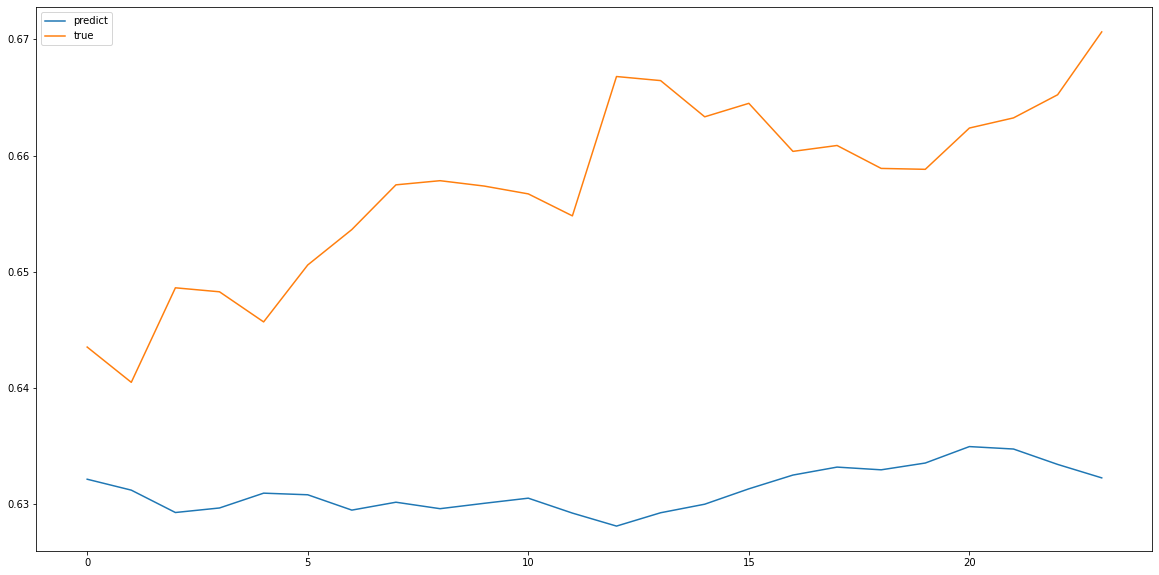

Test RMSE: 0.02721
Test MAE: 0.02614
Test MSE: 0.00074
Test RMSE: 213854080.34932
Test MAE: 205476048.00000


In [50]:
from sklearn.metrics import *

from matplotlib import pyplot
yhat = model.predict([testX])
plt.figure(figsize=(20,10))
yhat=yhat[24*3]
testy=testY[24*3]
testy=testy.reshape(-1,1)
pyplot.plot(yhat, label='predict')
pyplot.plot(testy, label='true')
pyplot.legend()
pyplot.show()

from math import *
rmse = sqrt(mean_squared_error(testy, yhat))
print('Test RMSE: %.5f' % rmse)

mae = mean_absolute_error(testy, yhat)
print('Test MAE: %.5f' % mae)

mse = mean_squared_error(testy, yhat)
print('Test MSE: %.5f' % mse)

yhat_inverse = yhat*(np.max(values)-np.min(values))+np.min(values)
testY_inverse=testy*(np.max(values)-np.min(values))+np.min(values)
rmse = sqrt(mean_squared_error(yhat_inverse, testY_inverse))
mae=mean_absolute_error(yhat_inverse, testY_inverse)
print('Test RMSE: %.5f' % rmse)
print('Test MAE: %.5f' % mae)

In [51]:
from math import *
from sklearn.metrics import *

non_aug_rm=[]
non_aug_ma=[]
non_aug_mp=[]
for k in j:

    yhat = model.predict([testX])
    yhat=yhat[24*k]
    testy=testY[24*k]
    yhat=yhat.reshape(-1,1)
    testy=testy.reshape(-1,1)
    rmse = sqrt(mean_squared_error(testy, yhat))
    
    mae = mean_absolute_error(testy, yhat)
    
    mape=mean_absolute_percentage_error(testy, np.array(yhat))
    print('Test MAPE: %.5f' % mape)
    print('Test MAE: %.5f' % mae)
    print('Test RMSE: %.5f' % rmse)
    non_aug_rm.append(rmse)
    non_aug_ma.append(mae)
    non_aug_mp.append(mape)


print(np.mean(non_aug_rm),np.std(non_aug_rm))
print(np.mean(non_aug_ma),np.std(non_aug_ma))
print(np.mean(non_aug_mp),np.std(non_aug_mp))

Test MAPE: 0.06321
Test MAE: 0.06151
Test RMSE: 0.06226
Test MAPE: 0.02842
Test MAE: 0.01912
Test RMSE: 0.02081
Test MAPE: 0.01348
Test MAE: 0.00807
Test RMSE: 0.00914
Test MAPE: 0.05681
Test MAE: 0.04255
Test RMSE: 0.04318
Test MAPE: 0.04424
Test MAE: 0.03272
Test RMSE: 0.03545
Test MAPE: 0.10511
Test MAE: 0.08129
Test RMSE: 0.08532
Test MAPE: 0.10944
Test MAE: 0.08888
Test RMSE: 0.10132
Test MAPE: 0.04826
Test MAE: 0.03460
Test RMSE: 0.03634
Test MAPE: 0.02181
Test MAE: 0.01597
Test RMSE: 0.01903
Test MAPE: 0.07146
Test MAE: 0.05902
Test RMSE: 0.06610
Test MAPE: 0.09010
Test MAE: 0.08467
Test RMSE: 0.08785
Test MAPE: 0.04939
Test MAE: 0.04310
Test RMSE: 0.04826
Test MAPE: 0.02942
Test MAE: 0.02527
Test RMSE: 0.02879
Test MAPE: 0.05717
Test MAE: 0.04639
Test RMSE: 0.04994
Test MAPE: 0.03965
Test MAE: 0.02614
Test RMSE: 0.02721
0.04806599650398521 0.026540141425454907
0.044620875 0.024730332
0.055196684 0.027888922


## CNN-LSTM (2)

In [68]:
from tensorflow.keras.models import Model

first_input = Input(shape=(168,6))

in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(first_input)
#in1= BatchNormalization(scale=False)(in1)

in1=Conv1D(filters=64, kernel_size=2, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in1)
#in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in1)

in1=Conv1D(filters=64, kernel_size=1, activation='relu',padding='same')(in1)
in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in1)

in1=Conv1D(filters=64, kernel_size=2, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in1)
#in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in1)

in1=Conv1D(filters=64, kernel_size=1, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in1)

#in1=add([in0,in1],name='extractor')
#attn_layer = AttentionLayer(name='attention_layer')
#attn_out, attn_states = attn_layer([in1,in1])

    # Concat attention input and LSTM output, in original code it was decoder LSTM
#concat_out = Concatenate(axis=-1, name='concat_layer')([in1, attn_out])
in1=MaxPooling1D(pool_size=2, name='extractor')(in1)
#in1=Dropout(0.5)(in1)
#in1=Flatten()(in1)
#in1=Dense(100, activation='relu')(in1)
in1=LSTM(100)(in1)
in1=Dense(100)(in1)
in1=Dropout(0.5)(in1)
out=Dense(24)(in1)
model=tf.keras.Model(inputs=[first_input],outputs=[out])
model.compile(optimizer='adam', loss='mse')

checkpoint_path = "saved_weights/btc_cnnlstm_multistep_2.hdf5"
cb = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_best_only=True,
                                        monitor='val_loss',mode='min',
                                                 verbose=1)


# history=model.fit(trainX, trainY, epochs=100, batch_size=100, validation_data=(valX, valY), verbose=1, callbacks=[cb])

Epoch 1/100
79/79 [==============================] - 6s 57ms/step - loss: 0.0030 - val_loss: 0.0010

Epoch 00001: val_loss improved from inf to 0.00103, saving model to saved_weights/btc_cnnlstm_multistep_2.hdf5
Epoch 2/100
79/79 [==============================] - 4s 55ms/step - loss: 6.6680e-04 - val_loss: 0.0012

Epoch 00002: val_loss did not improve from 0.00103
Epoch 3/100
79/79 [==============================] - 4s 56ms/step - loss: 4.2060e-04 - val_loss: 0.0044

Epoch 00003: val_loss did not improve from 0.00103
Epoch 4/100
79/79 [==============================] - 4s 56ms/step - loss: 3.3622e-04 - val_loss: 8.3756e-04

Epoch 00004: val_loss improved from 0.00103 to 0.00084, saving model to saved_weights/btc_cnnlstm_multistep_2.hdf5
Epoch 5/100
79/79 [==============================] - 4s 56ms/step - loss: 2.3783e-04 - val_loss: 8.6575e-04

Epoch 00005: val_loss did not improve from 0.00084
Epoch 6/100
79/79 [==============================] - 4s 56ms/step - loss: 1.8845e-04 - val_l

79/79 [==============================] - 4s 56ms/step - loss: 9.2989e-05 - val_loss: 4.5468e-04

Epoch 00048: val_loss did not improve from 0.00019
Epoch 49/100
79/79 [==============================] - 4s 56ms/step - loss: 6.6136e-05 - val_loss: 7.5968e-04

Epoch 00049: val_loss did not improve from 0.00019
Epoch 50/100
79/79 [==============================] - 4s 56ms/step - loss: 7.3015e-05 - val_loss: 4.9218e-04

Epoch 00050: val_loss did not improve from 0.00019
Epoch 51/100
79/79 [==============================] - 4s 56ms/step - loss: 6.6810e-05 - val_loss: 2.2444e-04

Epoch 00051: val_loss did not improve from 0.00019
Epoch 52/100
79/79 [==============================] - 4s 56ms/step - loss: 6.9280e-05 - val_loss: 1.9288e-04

Epoch 00052: val_loss did not improve from 0.00019
Epoch 53/100
79/79 [==============================] - 4s 56ms/step - loss: 6.9196e-05 - val_loss: 7.7375e-04

Epoch 00053: val_loss did not improve from 0.00019
Epoch 54/100
79/79 [===========================

79/79 [==============================] - 5s 57ms/step - loss: 6.0620e-05 - val_loss: 0.0012

Epoch 00099: val_loss did not improve from 0.00019
Epoch 100/100
79/79 [==============================] - 4s 56ms/step - loss: 5.8348e-05 - val_loss: 3.6645e-04

Epoch 00100: val_loss did not improve from 0.00019


In [69]:
model.load_weights("saved_weights/btc_cnnlstm_multistep_2.hdf5")

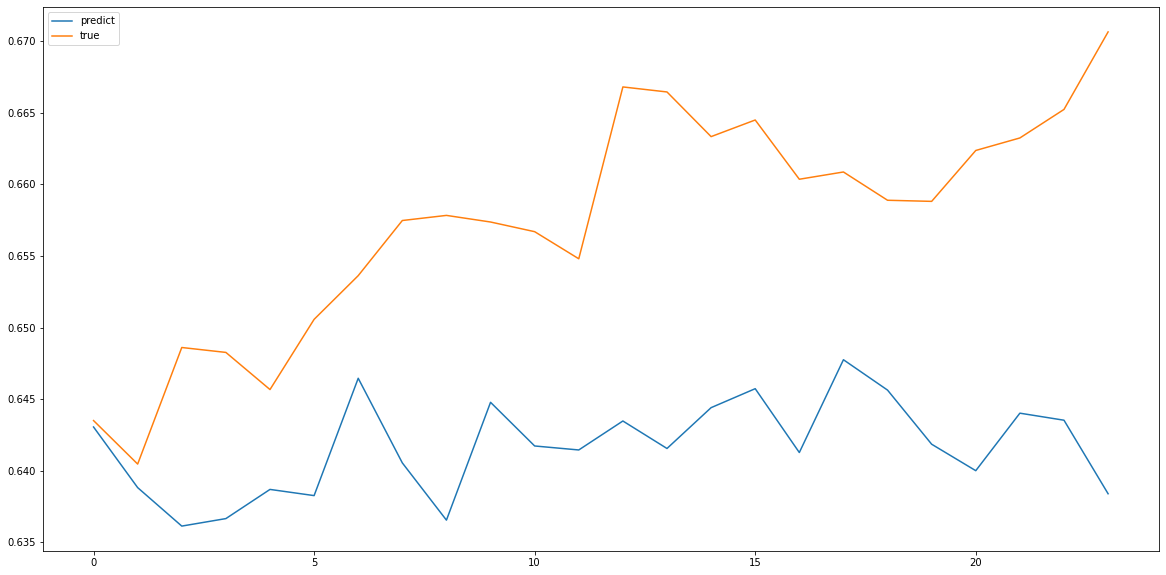

Test RMSE: 0.01720
Test MAE: 0.01565
Test MSE: 0.00030
Test RMSE: 135148707.20788
Test MAE: 122976600.00000


In [70]:
from sklearn.metrics import *

from matplotlib import pyplot
yhat = model.predict([testX])
plt.figure(figsize=(20,10))
yhat=yhat[24*3]
testy=testY[24*3]
testy=testy.reshape(-1,1)
pyplot.plot(yhat, label='predict')
pyplot.plot(testy, label='true')
pyplot.legend()
pyplot.show()

from math import *
rmse = sqrt(mean_squared_error(testy, yhat))
print('Test RMSE: %.5f' % rmse)

mae = mean_absolute_error(testy, yhat)
print('Test MAE: %.5f' % mae)

mse = mean_squared_error(testy, yhat)
print('Test MSE: %.5f' % mse)

yhat_inverse = yhat*(np.max(values)-np.min(values))+np.min(values)
testY_inverse=testy*(np.max(values)-np.min(values))+np.min(values)
rmse = sqrt(mean_squared_error(yhat_inverse, testY_inverse))
mae=mean_absolute_error(yhat_inverse, testY_inverse)
print('Test RMSE: %.5f' % rmse)
print('Test MAE: %.5f' % mae)

In [71]:
from math import *
from sklearn.metrics import *

non_aug_rm=[]
non_aug_ma=[]
non_aug_mp=[]
for k in j:

    yhat = model.predict([testX])
    yhat=yhat[24*k]
    testy=testY[24*k]
    yhat=yhat.reshape(-1,1)
    testy=testy.reshape(-1,1)
    rmse = sqrt(mean_squared_error(testy, yhat))
    
    mae = mean_absolute_error(testy, yhat)
    
    mape=mean_absolute_percentage_error(testy, np.array(yhat))
    print('Test MAPE: %.5f' % mape)
    print('Test MAE: %.5f' % mae)
    print('Test RMSE: %.5f' % rmse)
    non_aug_rm.append(rmse)
    non_aug_ma.append(mae)
    non_aug_mp.append(mape)


print(np.mean(non_aug_rm),np.std(non_aug_rm))
print(np.mean(non_aug_ma),np.std(non_aug_ma))
print(np.mean(non_aug_mp),np.std(non_aug_mp))

Test MAPE: 0.03352
Test MAE: 0.03265
Test RMSE: 0.03393
Test MAPE: 0.01631
Test MAE: 0.01103
Test RMSE: 0.01453
Test MAPE: 0.01337
Test MAE: 0.00796
Test RMSE: 0.00945
Test MAPE: 0.03451
Test MAE: 0.02589
Test RMSE: 0.02714
Test MAPE: 0.02612
Test MAE: 0.01936
Test RMSE: 0.02244
Test MAPE: 0.09881
Test MAE: 0.07649
Test RMSE: 0.08095
Test MAPE: 0.09192
Test MAE: 0.07516
Test RMSE: 0.09010
Test MAPE: 0.03108
Test MAE: 0.02235
Test RMSE: 0.02501
Test MAPE: 0.01963
Test MAE: 0.01411
Test RMSE: 0.01796
Test MAPE: 0.05123
Test MAE: 0.04234
Test RMSE: 0.04915
Test MAPE: 0.06731
Test MAE: 0.06345
Test RMSE: 0.06831
Test MAPE: 0.05609
Test MAE: 0.04766
Test RMSE: 0.05895
Test MAPE: 0.02554
Test MAE: 0.02154
Test RMSE: 0.02598
Test MAPE: 0.07144
Test MAE: 0.05764
Test RMSE: 0.06157
Test MAPE: 0.02369
Test MAE: 0.01565
Test RMSE: 0.01720
0.04017717025626248 0.02505523642789399
0.035550367 0.022593314
0.044038985 0.026499603
